# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import numpy as np

# **Sustainalytics**

## The reports were sourced from ResponsibilityReports.com, and ESG scores were obtained from **Sustainalytics**. #

In [2]:
# Path to the CSV file
file_path = '/kaggle/input/first-dataset-testing/preprocessed_content.csv'

# Read the CSV file
df1 = pd.read_csv(file_path)

# Display the first few rows
df1.head()

,Unnamed: 0,filename,ticker,year,preprocessed_content,ner_entities,e_score,s_score,g_score,total_score
0,0,ASX_BSX_2020.pdf,BSX,2020,style guide colour colour use imagecolour prof...,"['bk%', 'rgb', 'un', 'el ectric mine consortiu...",3.16,18.00,11.83,32.98
1,1,ASX_BSX_2022.pdf,BSX,2022,sustainability report look mining green office...,"['murray street', 'west perth', 'west perth', ...",2.83,12.86,10.32,26.02
2,2,ASX_EXR_2022.pdf,EXR,2022,report environment social governance esg basel...,"['september', 'mongolia', 'australia', 'austra...",3.81,4.28,5.86,13.94
3,3,LSE_ADM_2019.pdf,ADM,2019,corporate social responsibilty report introduc...,"['david stevens', 'csr board', 'just over yea...",16.38,14.20,5.90,36.36
4,4,LSE_ADM_2020.pdf,ADM,2020,sustainability admiral commit maintain respons...,"['year', 'health & wellbeing', 'a -month', 'on...",15.89,13.51,5.38,34.78


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            866 non-null    int64  
 1   filename              866 non-null    object 
 2   ticker                866 non-null    object 
 3   year                  866 non-null    int64  
 4   preprocessed_content  866 non-null    object 
 5   ner_entities          866 non-null    object 
 6   e_score               866 non-null    float64
 7   s_score               866 non-null    float64
 8   g_score               866 non-null    float64
 9   total_score           866 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 67.8+ KB


### No Null Values ###

In [28]:
df1.describe()

,Unnamed: 0,year,e_score,s_score,g_score,total_score
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,432.500000,2020.333718,5.904134,10.272229,7.423741,23.612240
std,250.136962,1.292287,5.684071,4.013380,2.532303,7.574159
min,0.000000,2014.000000,0.010000,1.280000,3.160000,6.990000
25%,216.250000,2019.000000,1.662500,7.542500,5.622500,17.822500
50%,432.500000,2020.000000,3.735000,9.855000,6.820000,22.710000
75%,648.750000,2021.000000,9.027500,12.875000,8.640000,28.760000
max,865.000000,2023.000000,24.840000,26.870000,16.470000,46.510000


## **Pairplot**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

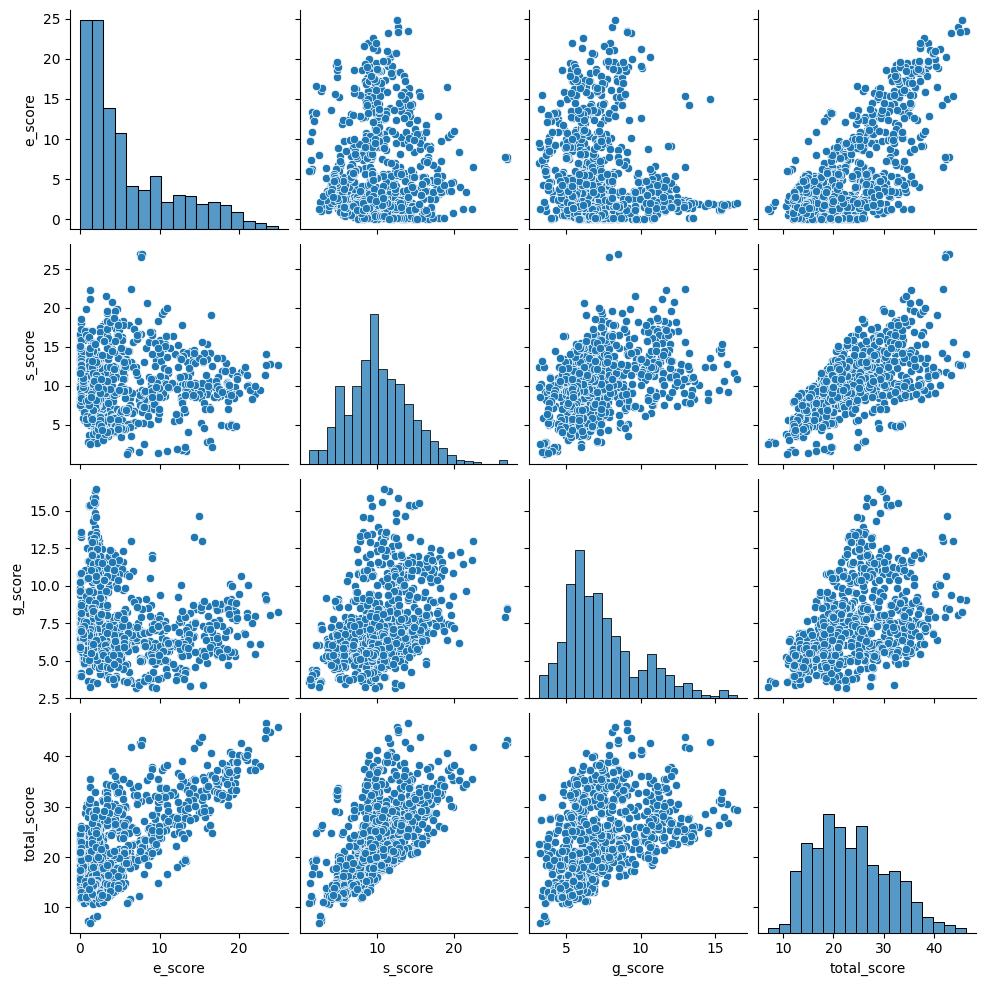

In [29]:
# Select the relevant columns for pairwise scatter plots
columns = ['e_score', 's_score', 'g_score', 'total_score']

# Create the pairplot
sns.pairplot(df1[columns])

# Show the plot
plt.show()


**We see a positive linear relationship between total_score & the 3 ESG pillarsalso we notice a lienra relationship between s_score and g_score**


## **Boxplot**

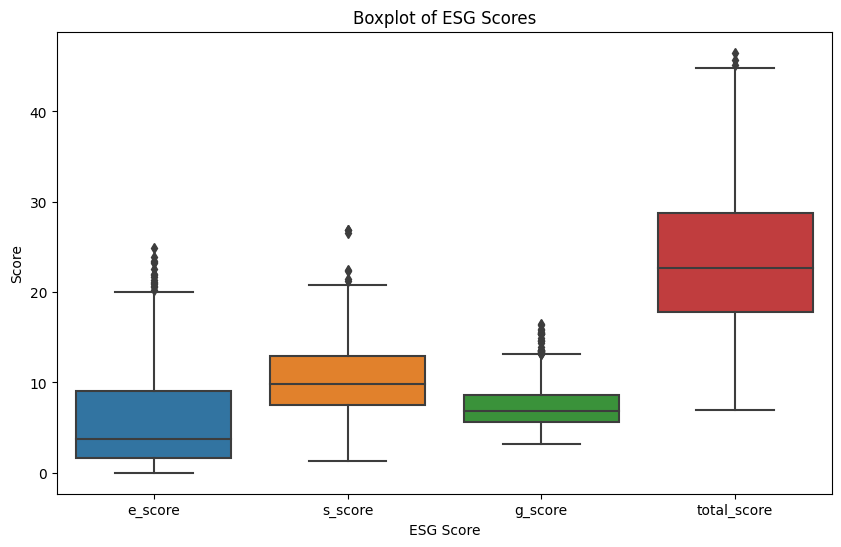

In [31]:
# Select the relevant columns for the boxplot
columns = ['e_score', 's_score', 'g_score', 'total_score']

# Melt the data to long format for easier plotting
data_melted = df1[columns].melt(var_name='ESG Score', value_name='Score')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='ESG Score', y='Score', data=data_melted)

# Show the plot
plt.title('Boxplot of ESG Scores')
plt.show()



### The social pillar has the highest median score, followed by the environmental and governance pillars. This suggests that, on average, entities perform better on social aspects than on environmental or governance aspects.

### The governance scores tend to be lower and less variable compared to environmental and social scores.

### **The total ESG score consolidates the variability seen in the individual pillars, showing a broader range of performance across entities.**


## Average ESG Scores Across Years

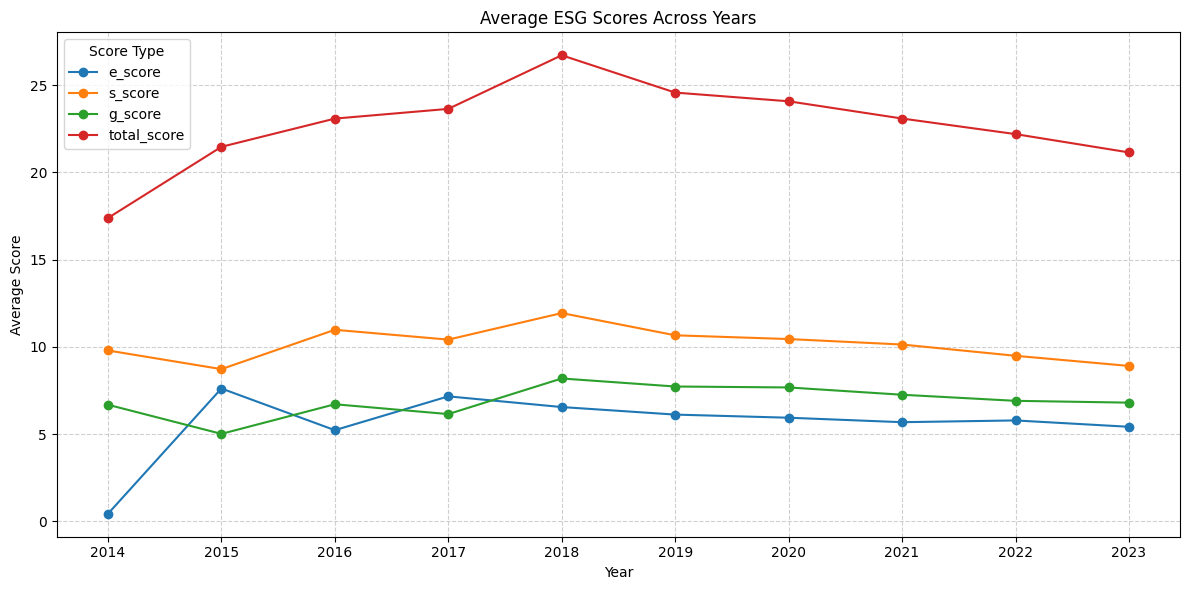

In [6]:

# Group by 'year' and calculate the mean of each score
aggregated_scores = df1.groupby('year')[['e_score', 's_score', 'g_score', 'total_score']].mean().reset_index()

# Plot the aggregated scores
plt.figure(figsize=(12, 6))
for score in ['e_score', 's_score', 'g_score', 'total_score']:
    plt.plot(aggregated_scores['year'], aggregated_scores[score], marker='o', label=score)

# Customize the plot
plt.title('Average ESG Scores Across Years')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.legend(title='Score Type')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(aggregated_scores['year'])
plt.tight_layout()

# Show the plot
plt.show()

### Overall Trend: The total ESG score shows a clear peak around 2018, followed by a gradual decline. This suggests that, on average, entities improved their ESG performance up to 2018 but have faced challenges maintaining or improving these scores since then.

### Environmental and Governance Scores: Both scores show a similar pattern of initial improvement followed by stabilization and a slight decline. This indicates that while initial efforts may have been made to improve these areas, sustaining high performance has been challenging.

### Social Score: The social score is the most stable among the three pillars, indicating consistent performance in social aspects over the years. However, there is a slight downward trend post-2018.

## **Clustering**

### **Select Features & Scale Data**

In [3]:
# Select columns for clustering
features = df1[['e_score', 's_score', 'g_score', 'total_score']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

### **Determine Optimal Number of Clusters using Silhouette Score**

In [49]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(scaled_features)
    print(f"Silhouette Score for k={k}: {silhouette_score(scaled_features, kmeans.labels_)}")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for k=2: 0.3501899296218837
Silhouette Score for k=3: 0.407336069125043


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for k=4: 0.3240926720854046
Silhouette Score for k=5: 0.33329997098695185


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for k=6: 0.33882916164668797
Silhouette Score for k=7: 0.3030719680089442


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for k=8: 0.3120915589737507
Silhouette Score for k=9: 0.3111672528165494


### **K-Means Clustering**

In [4]:
# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_features)

# View the clusters
print(df1[['ticker', 'Cluster']].head())

  ticker  Cluster
0    BSX        2
1    BSX        2
2    EXR        0
3    ADM        1
4    ADM        1


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **Visualising The clusters in 3D**

/tmp/ipykernel_30/2008465441.py:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



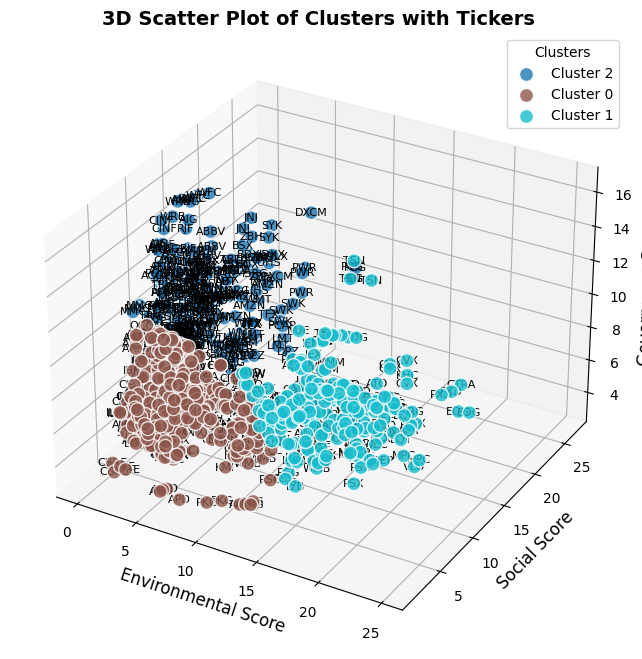

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create a colormap
unique_clusters = df1['Cluster'].unique()
colors = cm.get_cmap('tab10', len(unique_clusters))

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a unique color and annotate
for idx, cluster in enumerate(unique_clusters):
    cluster_data = df1[df1['Cluster'] == cluster]
    ax.scatter(
        cluster_data['e_score'], 
        cluster_data['s_score'], 
        cluster_data['g_score'], 
        color=colors(idx), 
        label=f'Cluster {cluster}', 
        s=100, alpha=0.8, edgecolors='w'
    )
    # Annotate each point
    for _, row in cluster_data.iterrows():
        ax.text(
            row['e_score'], 
            row['s_score'], 
            row['g_score'], 
            row['ticker'], 
            fontsize=8, 
            ha='center', 
            va='center'
        )

# Add labels, legend, and gridlines
ax.set_title('3D Scatter Plot of Clusters with Tickers', fontsize=14, fontweight='bold')
ax.set_xlabel('Environmental Score', fontsize=12)
ax.set_ylabel('Social Score', fontsize=12)
ax.set_zlabel('Governance Score', fontsize=12)
ax.legend(title="Clusters", fontsize=10)
ax.grid(True)

plt.show()



### Cluster 0: Represents entities that are lagging in ESG performance across all three pillars.
### Cluster 1: Represents entities with a balanced approach, showing good performance in social and governance scores and a wide range in environmental scores.
### Cluster 2: Represents entities with a strong governance focus, moderate social scores, and lower environmental scores. 


# **Refinitiv** ESG Statement 2018 - 2021.

In [2]:
# Path to the CSV file
file_path = '/kaggle/input/refinitiv/Top 100 US Tech firms MKT Cap n ESG performance.xlsx'

# Read the CSV file
df2 = pd.read_excel(file_path)

# Display the first few rows
df2.head()


,Ticker Symbol,Date,Market Capitalization,Total Assets,ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score,City
0,AAPL.O,2018,1.090307e+12,365725000000,70.92,55.69,68.32,88.23,"Cupertino, CA"
1,AAPL.O,2019,9.888870e+11,338516000000,68.88,60.00,65.40,82.49,"Cupertino, CA"
2,AAPL.O,2020,1.920273e+12,323888000000,75.69,63.77,76.82,83.62,"Cupertino, CA"
3,AAPL.O,2021,2.428612e+12,351002000000,79.79,65.77,78.95,92.97,"Cupertino, CA"
4,NVDA.O,2018,1.474580e+11,11241000000,75.57,72.37,69.38,89.63,"Santa Clara, CA"


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ticker Symbol                371 non-null    object 
 1   Date                         371 non-null    int64  
 2   Market Capitalization        371 non-null    float64
 3   Total Assets                 371 non-null    int64  
 4    ESG Score                   371 non-null    float64
 5    Environmental Pillar Score  371 non-null    float64
 6    Social Pillar Score         371 non-null    float64
 7    Governance Pillar Score     371 non-null    float64
 8   City                         371 non-null    object 
dtypes: float64(5), int64(2), object(2)
memory usage: 26.2+ KB


### No Null Values ###

In [3]:
df2.columns = df2.columns.str.strip()

In [42]:
df2.describe()

,Date,Market Capitalization,Total Assets,ESG Score,Environmental Pillar Score,Social Pillar Score,Governance Pillar Score
count,371.000000,3.710000e+02,3.710000e+02,371.000000,371.000000,371.000000,371.000000
mean,2019.504043,7.803731e+10,2.461921e+10,56.836658,45.481078,63.330539,56.351375
std,1.118329,2.413433e+11,5.292427e+10,19.483023,28.137983,19.446383,23.271432
min,2018.000000,5.029319e+08,3.071500e+08,8.690000,0.000000,12.860000,5.280000
25%,2019.000000,1.083971e+10,3.273494e+09,43.275000,19.690000,49.545000,40.285000
50%,2020.000000,2.049109e+10,7.416324e+09,58.550000,50.050000,65.640000,60.930000
75%,2020.500000,4.484620e+10,1.793500e+10,72.760000,69.530000,78.215000,72.770000
max,2021.000000,2.428612e+12,3.657250e+11,93.250000,98.110000,97.820000,95.300000


## **Visulize Yearly Changes: Analyze trends in Market Capitalization, Total Assets, and ESG Scores in ESG Scores for each Ticker Symbol over time.**

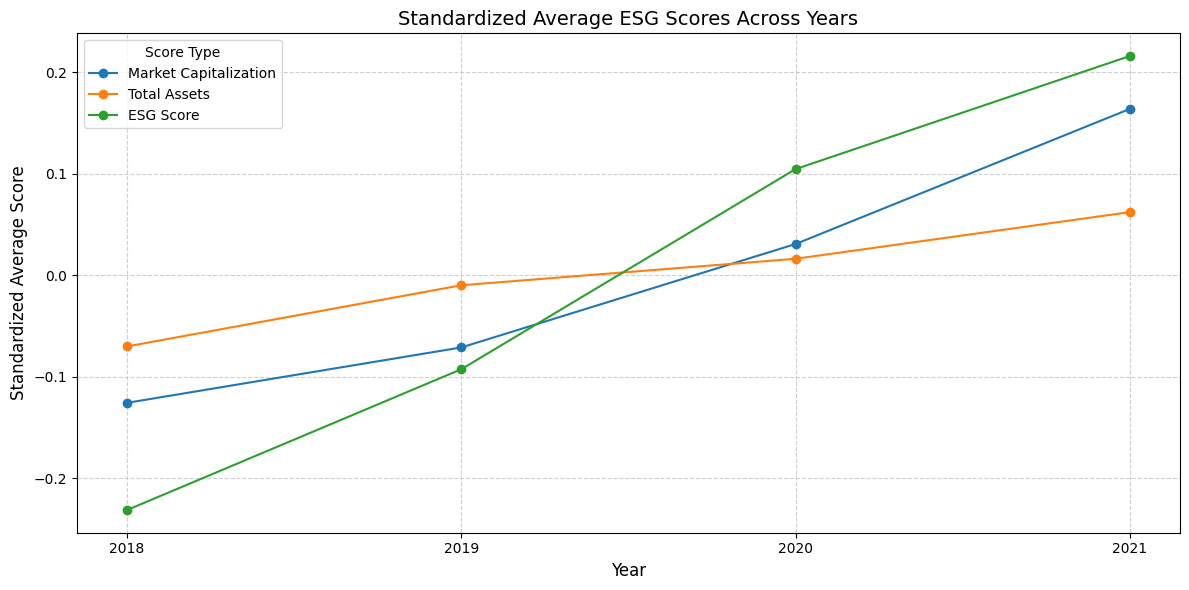

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize the scores
scaler = StandardScaler()
score_columns = ['Market Capitalization', 'Total Assets', 'ESG Score']
df2[score_columns] = scaler.fit_transform(df2[score_columns])

# Group by 'year' and calculate the mean of each score
aggregated_scores = df2.groupby('Date')[score_columns].mean().reset_index()

# Plot the aggregated scores
plt.figure(figsize=(12, 6))
for score in score_columns:
    plt.plot(aggregated_scores['Date'], aggregated_scores[score], marker='o', label=score)

# Customize the plot
plt.title('Standardized Average ESG Scores Across Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Standardized Average Score', fontsize=12)
plt.legend(title='Score Type')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.xticks(aggregated_scores['Date'])
plt.tight_layout()

# Show the plot
plt.show()


### Overall Trend: All three metrics (Market Capitalization, Total Assets, and ESG Score) show a positive and upward trend from 2018 to 2021.

### ESG Scores have shown the most significant improvement, suggesting a strong focus and effort on improving ESG practices.
### Market Capitalization and Total Assets have both improved steadily, indicating overall financial growth and stability.

### This positive correlation could suggest that better ESG performance is being recognized and rewarded in the market, leading to higher market valuations and asset growth.


### Further explanation to consider for the inverse relationship between ESG scores and financial indicators: Companies with high ESG scores might allocate resources toward sustainability and social initiatives, which could lower short-term financial performance.

### For instance, investments in reducing carbon emissions or improving labor standards might require significant upfront costs that reduce capital available for other growth initiatives.

## **Top 10 Cities by Average Total ESG Score**

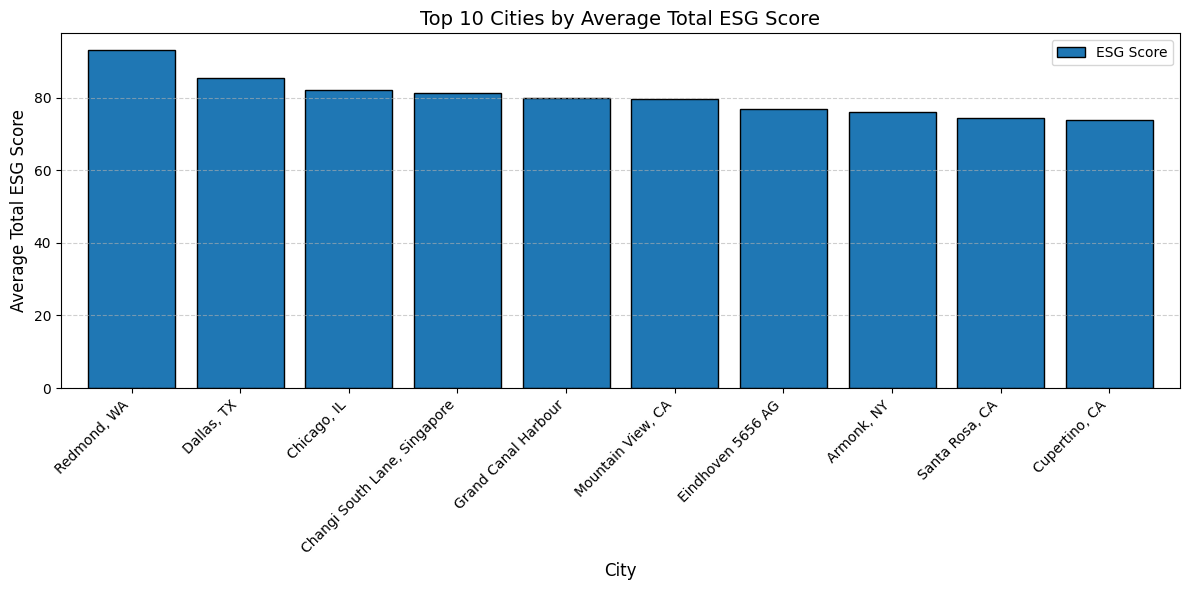

In [48]:
# Group by City and calculate average Total ESG Score
city_analysis = df2.groupby('City')['ESG Score'].mean().reset_index()

# Sort cities by average Total ESG Score and select the top 10
top_cities = city_analysis.nlargest(10, 'ESG Score')

# Plot city-wise Total ESG scores for the top 10 cities
top_cities.set_index('City').plot(kind='bar', figsize=(12, 6), edgecolor='black', width=0.8)

# Customize the plot
plt.title('Top 10 Cities by Average Total ESG Score', fontsize=14)
plt.ylabel('Average Total ESG Score', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


**Top Performers: Redmond, WA, and Dallas, TX, lead the list with the highest average total ESG scores, indicating exemplary ESG practices and can serve as benchmarks for other cities aiming to improve their ESG scores.**

## **Bottom 10 Cities by Average ESG Score**

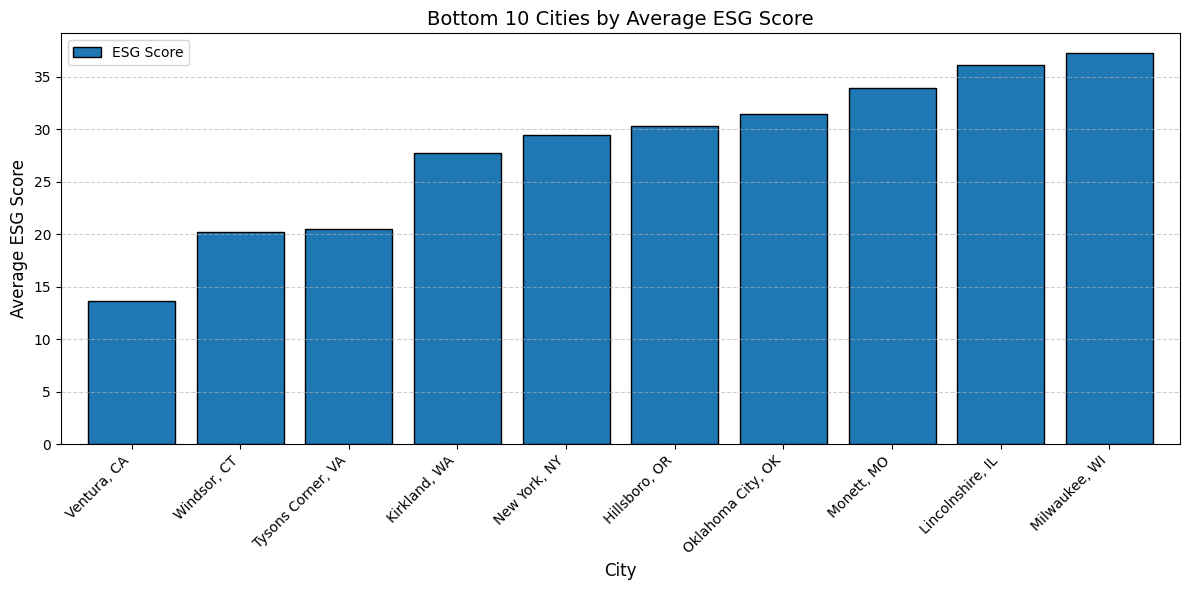

In [49]:
# Group by City and calculate average ESG Score
city_analysis = df2.groupby('City')['ESG Score'].mean().reset_index()

# Sort cities by average ESG Score and select the lowest 10
lowest_cities = city_analysis.nsmallest(10, 'ESG Score')

# Plot city-wise Total ESG scores for the lowest 10 cities
lowest_cities.set_index('City').plot(kind='bar', figsize=(12, 6), edgecolor='black', width=0.8)

# Customize the plot
plt.title('Bottom 10 Cities by Average ESG Score', fontsize=14)
plt.ylabel('Average ESG Score', fontsize=12)
plt.xlabel('City', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


**Cities like Ventura, CA, and Windsor, CT, need to prioritize enhancing their ESG practices to improve their scores.**

In [4]:
# List current columns of df2
print("Original Columns:", df2.columns.tolist())

# Strip leading and trailing spaces from column names
df2.columns = df2.columns.str.strip()

# Verify updated columns
print("Updated Columns:", df2.columns.tolist())

Original Columns: ['Ticker Symbol', 'Date', 'Market Capitalization', 'Total Assets', 'ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'City']
Updated Columns: ['Ticker Symbol', 'Date', 'Market Capitalization', 'Total Assets', 'ESG Score', 'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score', 'City']


## **Spearman** Correlation Matrix

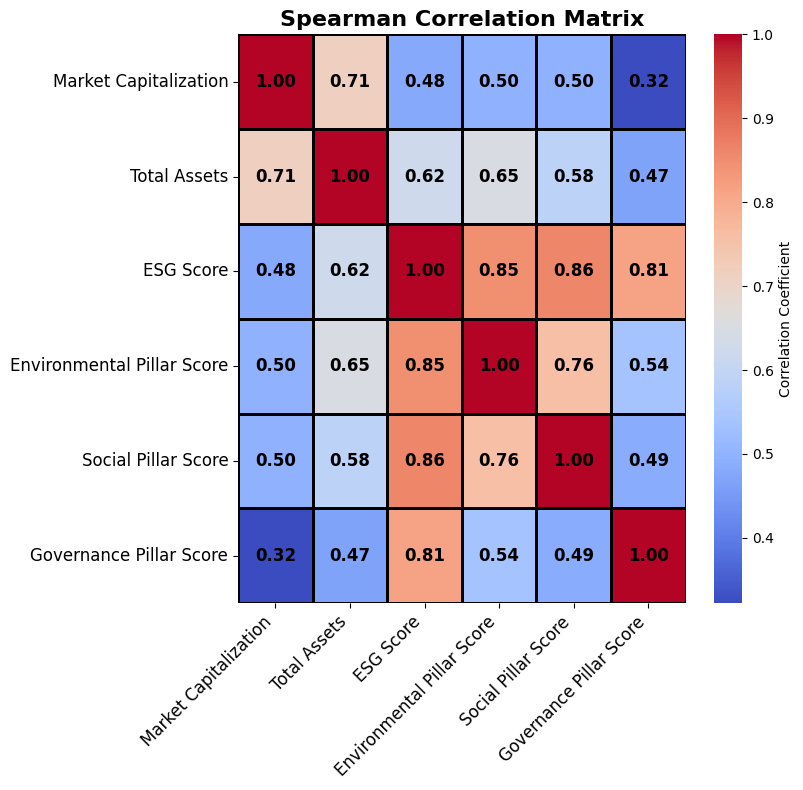

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Spearman correlations
spearman_corr = df2[['Market Capitalization', 'Total Assets', 'ESG Score', 
                    'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score']].corr(method='spearman')

# Set the figure size and layout
plt.figure(figsize=(14, 8))

# Spearman heatmap with enhancements
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'}, 
            linewidths=1, linecolor='black', 
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'})

# Set titles and axis labels
plt.title('Spearman Correlation Matrix', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


#### Why Spearman correlation?
#### Spearman is less sensitive to outliers because it ranks the data, and outliers affect ranks less than they affect raw values.

#### Use Case: When the data doesn’t meet the assumptions of normality or linearity, or when you’re interested in understanding whether one variable consistently increases or decreases as the other does, but not necessarily in a linear fashion.

In [ ]:
pip install networkx matplotlib seaborn pandas scipy

## **Community Detection using NetworX**

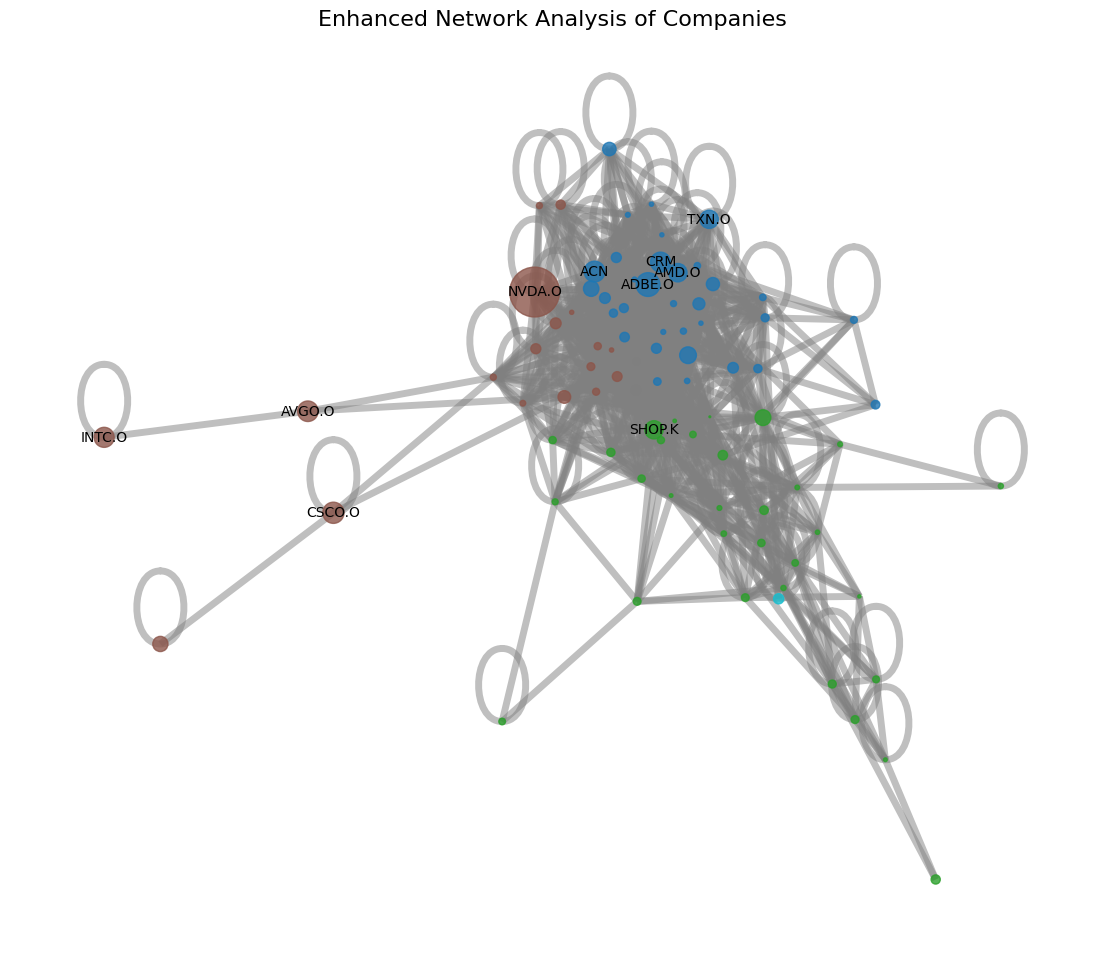

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from networkx.algorithms.components import connected_components
from networkx.algorithms.community import greedy_modularity_communities

# Assuming df2 is your DataFrame with the relevant company metrics
numeric_columns = ['Market Capitalization', 'Total Assets', 'ESG Score', 
                   'Environmental Pillar Score', 'Social Pillar Score', 'Governance Pillar Score']

# Normalize the data for similarity analysis
df_normalized = df2[numeric_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(df_normalized)

# Create a NetworkX graph
G = nx.Graph()

# Add nodes with attributes (Market Cap and ESG Score)
for i, company in enumerate(df2['Ticker Symbol']):
    G.add_node(company, Market_Capitalization=df2['Market Capitalization'][i], ESG_Score=df2['ESG Score'][i])

# Calculate the distribution of similarities and dynamically select the top 5%
similarities = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
threshold = np.percentile(similarities, 95)  # Top 5% of similarities

# Add edges for the top 5% of similar pairs
for i in range(len(df2)):
    for j in range(i+1, len(df2)):
        if similarity_matrix[i, j] > threshold:
            G.add_edge(df2['Ticker Symbol'][i], df2['Ticker Symbol'][j], weight=similarity_matrix[i, j])

# Step 1: Filter to the largest connected component
largest_cc = max(connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Apply community detection to color nodes
communities = greedy_modularity_communities(G)

# Create a mapping of nodes to their community index
community_map = {n: i for i, community in enumerate(communities) for n in community}

# Add the community information as a node attribute
nx.set_node_attributes(G, community_map, 'community')


# Visualizing the network
plt.figure(figsize=(14, 12))

# Use a layout with better clarity
pos = nx.spring_layout(G)  # Spring layout for community visualization

# Node size based on Market Capitalization (scaled for better visualization)
node_size = [G.nodes[node]['Market_Capitalization'] / 1e9 for node in G]  # Scale by billions for visibility
node_color = [G.nodes[node]['community'] for node in G]  # Color nodes based on community
sns.set_palette("Set3")  # Set color palette for community clusters

# Draw nodes with adjusted sizes and colors
nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_color, cmap=plt.cm.tab10, alpha=0.8)

# Draw edges with width based on similarity strength
edge_width = [G[u][v]['weight'] * 5 for u, v in G.edges()]  # Scale width for visibility
nx.draw_networkx_edges(G, pos, width=edge_width, alpha=0.5, edge_color='grey')

# Display labels only for top nodes by Market Capitalization
top_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['Market_Capitalization'], reverse=True)[:10]
top_labels = {node[0]: node[0] for node in top_nodes}
nx.draw_networkx_labels(G, pos, labels=top_labels, font_size=10, font_family='sans-serif')

# Add a title and show the plot
plt.title('Enhanced Network Analysis of Companies', fontsize=16)
plt.axis('off')  # Hide axis for better aesthetics
plt.show()



### Nodes: Each node represents a company. The size of the nody corresponds to a metric such as market capitalization, with larger nodes indicating higher market cap.

### Edges: The edge represent the similarity between companies based on their ESG score & financials. Thicker edges indicate stronger similarities


### Color Coding: The nodes are color-coded indicating different communinies. These clusters determined based on the similarity of their ESG scores

### Clusters: Dense Cluster (Center): The central part of the graph has a dense cluster of nodes, indicating a group of companies that are highly similar to each other based on the metrics 


### Peripheral Nodes: The nodes on the periphery are less connected, indicating that they are less similar to the central cluster of the community.


### **Key Companies**
### Labeled Nodes: Some nodes are labeled, such as NVDA.O, ACN, CRM, ADBE.O, etc. These likely represent higher market capitalization within the dataset.
*
### Size and Position: Larger nodes like NVDA.O (NVIDIA) are prominently positioned, indicating their significant market capitalization and possibly central role in the network.


## **NLP**

### Keywords for controversy

In [89]:
keywords = [
    # General Issues
    "controversy", "scandal", "lawsuit", "investigation", "regulatory issues", 
    "compliance violations", "allegations", "misconduct", "spying",
    
    # Financial Mismanagement
    "fraud", "embezzlement", "misrepresentation", "tax evasion",
    
    # Reputation
    "boycott", "reputation damage", "consumer backlash",
    
    # Environmental Keywords
    # Climate and Resources
    "pollution", "toxic waste", "carbon emissions", "deforestation", "biodiversity loss",
    
    # Energy
    "energy waste", "unsustainable practices", "fossil fuels", "renewable energy violation",
    
    # Regulations
    "environmental fines", "EPA violations", "non-compliance with environmental standards",
    
    # Social Keywords
    # Labor and Human Rights
    "labor rights violation", "violation", "child labor", "discrimination", "union busting", "workplace safety",
    
    # Community Impact
    "community displacement", "indigenous rights violation", "human rights abuse", "abuse"
    
    # Customer Issues
    "data breach", "product safety", "consumer lawsuits",
    
    # Governance Keywords
    # Leadership Issues
    "board conflicts", "CEO misconduct", "bribery", "corruption", "insider trading",
    
    # Operational Integrity
    "antitrust", "privacy violation", "data security breach",
    
    # Transparency and Ethics
    "lack of transparency", "ethics violation", "conflicts of interest"
]


### Most famous Tech companies within the dataset

In [45]:
tickers_to_names = [
    'Apple',
    'NVIDIA',
    'Microsoft',
    'Oracle',
    'Salesforce',
    'Adobe',
    'Cisco',
    'IBM',
    'Intel',
    'HP',
    'MongoDB',
]

## Scrapping news from Yahoo using BeautifulSoup

In [70]:
import requests
from bs4 import BeautifulSoup
import datetime
import json

# Define the year for the articles
target_year = 2018

# Function to extract article content
def extract_article_content(url):
    try:
        article_response = requests.get(url)
        article_soup = BeautifulSoup(article_response.content, 'html.parser')
        paragraphs = article_soup.find_all('p')
        article_content = ' '.join([p.get_text() for p in paragraphs])
        return article_content
    except Exception as e:
        print(f"Failed to extract article content from {url}: {e}")
        return None

# Function to parse date
def parse_date(date_string):
    for fmt in ('%b %d, %Y', '%B %d, %Y', '%Y-%m-%d'):
        try:
            return datetime.datetime.strptime(date_string, fmt)
        except ValueError:
            continue
    return None

# Function to check if the article is within the target year
def is_within_year(date_string, target_year):
    # Handle relative dates like "2 hours ago" by assuming they are within the target year
    if "hour" in date_string or "minute" in date_string or "day" in date_string:
        return True
    article_date = parse_date(date_string)
    return article_date and article_date.year == target_year

# Initialize the list to store all articles
all_articles = []

# Loop through each company in tickers_to_names
for search_query in tickers_to_names:
    url = f'https://news.search.yahoo.com/search?p={search_query}'

    # Send a request to the URL
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find and print news articles
    articles = soup.find_all('div', class_='NewsArticle')
    filtered_articles = []

    for article in articles:
        title = article.find('h4').text
        link = article.find('a')['href']
        
        # Extract article content
        content = extract_article_content(link)
        if content:
            # Check if the article date is within the specified year
            date_string = article.find('span', class_='s-time').text
            if is_within_year(date_string, target_year):
                filtered_articles.append({
                    'company': search_query,
                    'title': title,
                    'url': link,
                    'content': content,
                    'date': date_string
                })
            else:
                print(f"Article date {date_string} is out of range or could not be parsed for article: {title}")

    # Add the filtered articles for the current search query to the main list
    all_articles.extend(filtered_articles)

# After collecting all articles in the `all_articles` list

# Convert the list of articles into a DataFrame
df = pd.DataFrame(all_articles)

# Display the first 10 rows of the DataFrame
df.head(10)

Failed to extract article content from https://forums.appleinsider.com/discussion/238515/apple-intelligence-has-been-seven-years-in-the-making-says-cook: HTTPSConnectionPool(host='forums.appleinsider.com', port=443): Max retries exceeded with url: /discussion/238515/apple-intelligence-has-been-seven-years-in-the-making-says-cook (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1007)')))


,company,title,url,content,date
0,Apple,The Best Apple AirPods Deals For December 2024,https://www.yahoo.com/tech/best-apple-airpods-...,Manage your account PCMag editors select a...,1 hour ago ·
1,Apple,Apple TV+ announces second season for beloved ...,https://macdailynews.com/2024/12/04/apple-tv-a...,Update font size. Reset Apple TV+ on Wednesday...,30 minutes ago ·
2,Apple,"Apple CEO Tim Cook asked about his future, say...",https://finance.yahoo.com/news/apple-ceo-tim-c...,We are experiencing some temporary issues. The...,2 hours ago ·
3,Apple,Apple Music's yearly recap is now accessible i...,https://www.androidheadlines.com/2024/12/apple...,Sign Up! \n\nenvelope_alt\n\n\n Get the latest...,4 hours ago ·
4,Apple,"Apple Music Replay is here, and it pales in co...",https://www.zdnet.com/home-and-office/home-ent...,"Brace yourself: It's that time of year again, ...",3 hours ago ·
5,Apple,Magnificent Seven Stocks: Nvidia Stock Rallies...,https://www.investors.com/research/magnificent...,\n Access to this page has been...,19 minutes ago ·
6,Apple,Apple AirTags make a great gift - especially w...,https://www.zdnet.com/article/apple-airtags-ma...,'ZDNET Recommends': What exactly does it mean?...,2 hours ago ·
7,Apple,Apple's ecosystem is a 'prison yard' for emplo...,https://qz.com/apple-lawsuit-free-speech-priva...,A current Apple (AAPL+0.09%) employee is suing...,6 hours ago ·
8,Apple,"Spotify Wrapped, Apple Music Replay have final...",https://www.yahoo.com/entertainment/spotify-wr...,Manage your account It's a great day for m...,5 hours ago ·
9,NVIDIA,"Nvidia Sees 179% YTD Gain, Evaluates Cash Use ...",https://finance.yahoo.com/news/nvidia-sees-179...,We are experiencing some temporary issues. The...,4 minutes ago ·


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  97 non-null     object
 1   title    97 non-null     object
 2   url      97 non-null     object
 3   content  97 non-null     object
 4   date     97 non-null     object
dtypes: object(5)
memory usage: 3.9+ KB


In [48]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


## Text Cleaning using NLTK & Spacy 

In [82]:
# Download necessary NLTK resources (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import re  # For regular expression operations
import string  # For handling punctuation
import spacy  # For spaCy's lemmatizer and text processing
from nltk.tokenize import word_tokenize  # For tokenization
from nltk.corpus import stopwords  # For stop words

# Load the spaCy model (You can download it with `python -m spacy download en_core_web_sm` if needed)
nlp = spacy.load("en_core_web_sm")

# Stop words (using NLTK)
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize the tokens
    cleaned_tokens = [
        nlp(word)[0].lemma_ for word in tokens if word not in stop_words
    ]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text

# Apply the cleaning function to the 'content' column
df['content_cleaned'] = df['content'].apply(clean_text)

# Print the first 10 rows of the DataFrame to verify
df.head(10)

,company,title,url,content,date,content_cleaned,sentiment_score,sentiment_label,controversy
0,Apple,The Best Apple AirPods Deals For December 2024,https://www.yahoo.com/tech/best-apple-airpods-...,Manage your account PCMag editors select a...,1 hour ago ·,manage account pcmag editor select review prod...,0.103930,positive,None
1,Apple,Apple TV+ announces second season for beloved ...,https://macdailynews.com/2024/12/04/apple-tv-a...,Update font size. Reset Apple TV+ on Wednesday...,30 minutes ago ·,update font size reset apple tv wednesday anno...,0.111208,positive,[antitrust]
2,Apple,"Apple CEO Tim Cook asked about his future, say...",https://finance.yahoo.com/news/apple-ceo-tim-c...,We are experiencing some temporary issues. The...,2 hours ago ·,experience temporary issue market datum page c...,-0.047167,negative,"[lawsuit, antitrust]"
3,Apple,Apple Music's yearly recap is now accessible i...,https://www.androidheadlines.com/2024/12/apple...,Sign Up! \n\nenvelope_alt\n\n\n Get the latest...,4 hours ago ·,sign envelopealt get late android news inbox e...,0.066266,positive,None
4,Apple,"Apple Music Replay is here, and it pales in co...",https://www.zdnet.com/home-and-office/home-ent...,"Brace yourself: It's that time of year again, ...",3 hours ago ·,brace time year music stream platform reveal t...,0.161891,positive,None
5,Apple,Magnificent Seven Stocks: Nvidia Stock Rallies...,https://www.investors.com/research/magnificent...,\n Access to this page has been...,19 minutes ago ·,access page deny believe use automation tool b...,0.500000,positive,None
6,Apple,Apple AirTags make a great gift - especially w...,https://www.zdnet.com/article/apple-airtags-ma...,'ZDNET Recommends': What exactly does it mean?...,2 hours ago ·,zdnet recommend exactly mean zdnet recommendat...,0.137023,positive,None
7,Apple,Apple's ecosystem is a 'prison yard' for emplo...,https://qz.com/apple-lawsuit-free-speech-priva...,A current Apple (AAPL+0.09%) employee is suing...,6 hours ago ·,current apple aapl employee sue company illega...,0.096096,positive,"[lawsuit, discrimination]"
8,Apple,"Spotify Wrapped, Apple Music Replay have final...",https://www.yahoo.com/entertainment/spotify-wr...,Manage your account It's a great day for m...,5 hours ago ·,manage account great day music lover — spotify...,0.143295,positive,None
9,NVIDIA,"Nvidia Sees 179% YTD Gain, Evaluates Cash Use ...",https://finance.yahoo.com/news/nvidia-sees-179...,We are experiencing some temporary issues. The...,4 minutes ago ·,experience temporary issue market datum page c...,0.073724,positive,"[investigation, antitrust]"


## Sentiment Analysis using TextBlob 

In [84]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)

# Apply sentiment analysis to the 'content_cleaned' column
df['sentiment_score'] = df['content_cleaned'].apply(get_sentiment)

# Add a sentiment label based on the score
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

# Display the first 10 rows
df.head(10)


,company,title,url,content,date,content_cleaned,sentiment_score,sentiment_label,controversy
0,Apple,The Best Apple AirPods Deals For December 2024,https://www.yahoo.com/tech/best-apple-airpods-...,Manage your account PCMag editors select a...,1 hour ago ·,manage account pcmag editor select review prod...,0.103930,positive,None
1,Apple,Apple TV+ announces second season for beloved ...,https://macdailynews.com/2024/12/04/apple-tv-a...,Update font size. Reset Apple TV+ on Wednesday...,30 minutes ago ·,update font size reset apple tv wednesday anno...,0.111208,positive,[antitrust]
2,Apple,"Apple CEO Tim Cook asked about his future, say...",https://finance.yahoo.com/news/apple-ceo-tim-c...,We are experiencing some temporary issues. The...,2 hours ago ·,experience temporary issue market datum page c...,-0.047167,negative,"[lawsuit, antitrust]"
3,Apple,Apple Music's yearly recap is now accessible i...,https://www.androidheadlines.com/2024/12/apple...,Sign Up! \n\nenvelope_alt\n\n\n Get the latest...,4 hours ago ·,sign envelopealt get late android news inbox e...,0.066266,positive,None
4,Apple,"Apple Music Replay is here, and it pales in co...",https://www.zdnet.com/home-and-office/home-ent...,"Brace yourself: It's that time of year again, ...",3 hours ago ·,brace time year music stream platform reveal t...,0.161891,positive,None
5,Apple,Magnificent Seven Stocks: Nvidia Stock Rallies...,https://www.investors.com/research/magnificent...,\n Access to this page has been...,19 minutes ago ·,access page deny believe use automation tool b...,0.500000,positive,None
6,Apple,Apple AirTags make a great gift - especially w...,https://www.zdnet.com/article/apple-airtags-ma...,'ZDNET Recommends': What exactly does it mean?...,2 hours ago ·,zdnet recommend exactly mean zdnet recommendat...,0.137023,positive,None
7,Apple,Apple's ecosystem is a 'prison yard' for emplo...,https://qz.com/apple-lawsuit-free-speech-priva...,A current Apple (AAPL+0.09%) employee is suing...,6 hours ago ·,current apple aapl employee sue company illega...,0.096096,positive,"[lawsuit, discrimination]"
8,Apple,"Spotify Wrapped, Apple Music Replay have final...",https://www.yahoo.com/entertainment/spotify-wr...,Manage your account It's a great day for m...,5 hours ago ·,manage account great day music lover — spotify...,0.143295,positive,None
9,NVIDIA,"Nvidia Sees 179% YTD Gain, Evaluates Cash Use ...",https://finance.yahoo.com/news/nvidia-sees-179...,We are experiencing some temporary issues. The...,4 minutes ago ·,experience temporary issue market datum page c...,0.073724,positive,"[investigation, antitrust]"


## Searching for controversy words

In [90]:
# Function to check for keywords in content
def find_keywords_in_content(text):
    # Find matching keywords in the text
    matching_keywords = [word for word in keywords if word in text.lower()]
    return matching_keywords if matching_keywords else None

# Apply the function to the content column and create the controversy column
df['controversy'] = df['content'].apply(find_keywords_in_content)

# Display the updated DataFrame
df.head(10)

,company,title,url,content,date,content_cleaned,sentiment_score,sentiment_label,controversy
0,Apple,The Best Apple AirPods Deals For December 2024,https://www.yahoo.com/tech/best-apple-airpods-...,Manage your account PCMag editors select a...,1 hour ago ·,manage account pcmag editor select review prod...,0.103930,positive,None
1,Apple,Apple TV+ announces second season for beloved ...,https://macdailynews.com/2024/12/04/apple-tv-a...,Update font size. Reset Apple TV+ on Wednesday...,30 minutes ago ·,update font size reset apple tv wednesday anno...,0.111208,positive,[antitrust]
2,Apple,"Apple CEO Tim Cook asked about his future, say...",https://finance.yahoo.com/news/apple-ceo-tim-c...,We are experiencing some temporary issues. The...,2 hours ago ·,experience temporary issue market datum page c...,-0.047167,negative,"[lawsuit, antitrust]"
3,Apple,Apple Music's yearly recap is now accessible i...,https://www.androidheadlines.com/2024/12/apple...,Sign Up! \n\nenvelope_alt\n\n\n Get the latest...,4 hours ago ·,sign envelopealt get late android news inbox e...,0.066266,positive,None
4,Apple,"Apple Music Replay is here, and it pales in co...",https://www.zdnet.com/home-and-office/home-ent...,"Brace yourself: It's that time of year again, ...",3 hours ago ·,brace time year music stream platform reveal t...,0.161891,positive,None
5,Apple,Magnificent Seven Stocks: Nvidia Stock Rallies...,https://www.investors.com/research/magnificent...,\n Access to this page has been...,19 minutes ago ·,access page deny believe use automation tool b...,0.500000,positive,None
6,Apple,Apple AirTags make a great gift - especially w...,https://www.zdnet.com/article/apple-airtags-ma...,'ZDNET Recommends': What exactly does it mean?...,2 hours ago ·,zdnet recommend exactly mean zdnet recommendat...,0.137023,positive,None
7,Apple,Apple's ecosystem is a 'prison yard' for emplo...,https://qz.com/apple-lawsuit-free-speech-priva...,A current Apple (AAPL+0.09%) employee is suing...,6 hours ago ·,current apple aapl employee sue company illega...,0.096096,positive,"[lawsuit, violation, discrimination]"
8,Apple,"Spotify Wrapped, Apple Music Replay have final...",https://www.yahoo.com/entertainment/spotify-wr...,Manage your account It's a great day for m...,5 hours ago ·,manage account great day music lover — spotify...,0.143295,positive,None
9,NVIDIA,"Nvidia Sees 179% YTD Gain, Evaluates Cash Use ...",https://finance.yahoo.com/news/nvidia-sees-179...,We are experiencing some temporary issues. The...,4 minutes ago ·,experience temporary issue market datum page c...,0.073724,positive,"[investigation, antitrust]"


## **WordCloud**

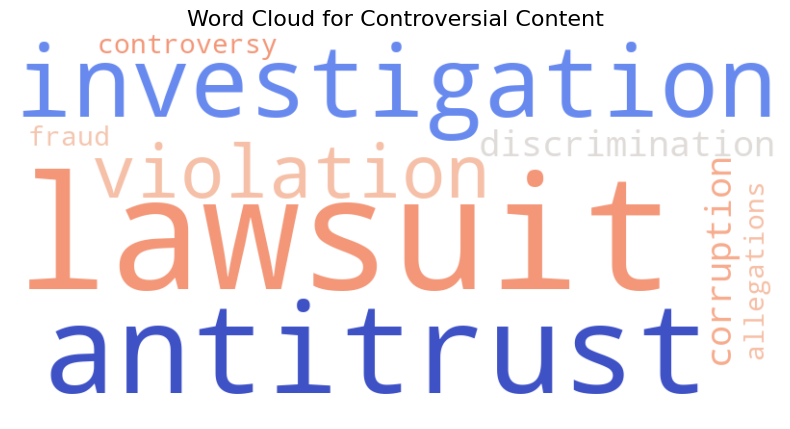

In [92]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter rows where controversy is not null
filtered_df = df[df['controversy'].notnull()]

# Extract the controversy words from the 'controversy' column and create a single string
controversy_words = []

# Loop through the 'controversy' column to extract keywords
for controversy_list in filtered_df['controversy']:
    # Add all the controversy words to the list
    controversy_words.extend(controversy_list)

# Convert the list of controversy words into a single string
controversy_text = " ".join(controversy_words)

# Generate the word cloud with enhanced layout and design
wordcloud = WordCloud(
    width=800, height=400, background_color="white",
    contour_color="black", contour_width=1,  # Contour for better visual effect
    max_words=200,  # Limit the number of words in the cloud
    min_font_size=10,  # Minimum font size for smaller words
    relative_scaling=0.5,  # Scaling factor for word sizes
    colormap='coolwarm',  # Use a cool-to-warm color gradient
    prefer_horizontal=0.5,  # Randomize word orientation (50% horizontal, 50% vertical)
    collocations=False  # Disable collocations (e.g., New York should be two words)
).generate(controversy_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Controversial Content", fontsize=16)
plt.show()


# **MSCI**

## Scraped from YahooFinance.com, Investing.com, StockAnalysis.com, **MSCI** #




In [2]:
# Path to the CSV file
file_path = '/kaggle/input/ghghghgh/Untitled spreadsheet (1).xlsx'

# Read the CSV file
# Load the Excel file
df3 = pd.read_excel(file_path)

# Display the first few rows
df3.head()


,domain,name,ticker,involvement.Alcoholic Beverages,involvement.Adult Entertainment,involvement.Gambling,involvement.Tobacco Products,involvement.Animal Testing,involvement.Fur and Specialty Leather,involvement.Controversial Weapons,...,Controversies.Impact on Local Communities,Controversies.Biodiversity & Land Use,Controversies.Other,Controversies.Marketing & Advertising,Controversies.Civil Liberties,Controversies.Operational Waste (Non-Hazardous),Controversies.Supply Chain Management,Controversies.Water Stress,Controversies.Child Labor,Controversies.Controversial Investments
0,f5.com,F5 Networks,FFIV,No,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dell.com,Dell,DELL,No,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,att.com,AT&T,T,No,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,verizon.com,Verizon,VZ,No,No,No,No,No,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hp.com,Hewlett Packard,HPQ,No,No,No,No,Yes,No,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7610 entries, 0 to 7609
Data columns (total 85 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   domain                                                             7610 non-null   object 
 1   name                                                               7610 non-null   object 
 2   ticker                                                             7489 non-null   object 
 3   involvement.Alcoholic Beverages                                    52 non-null     object 
 4   involvement.Adult Entertainment                                    52 non-null     object 
 5   involvement.Gambling                                               52 non-null     object 
 6   involvement.Tobacco Products                                       52 non-null     object 
 7   involvement.Animal Testi

## **Data Cleaning**

In [3]:
# Remove leading and trailing spaces from column names
df3.columns = df3.columns.str.strip()

## **Remove unnecessary columns**

### **PS:**

#### Altmanscore & Piotroski scores are tools used to assess the financial stability of companies but from different perspectives. 

#### The Altman Z-score is more focused on bankruptcy prediction, while the Piotroski F-score evaluates fundamental financial health based on operational factors.

In [4]:
# remove companies with 0 esg score
df3 = df3.dropna(subset=['esg'])

#drop all columns where all values are null
df3 = df3.dropna(axis=1, how='all')

#drop all rows where all values are null
df3 = df3.dropna(axis=0, how='all')

# Drop the column by its name
df3 = df3.drop(columns=['domain','altman_score','piotroski_score','Temperature Goal' ,'employees','Decarbonization Target.Comprehensiveness' ,'Decarbonization Target.Decarbonization Target on Temperature Rise',
                       
                       'Decarbonization Target.Target Year' ,'Decarbonization Target.Ambition p.a.', 'Decarbonization Target.Decarbonization Target' ])


### **Remove Single unique value**

In [5]:
# Identify columns with a single unique value
columns_to_remove = [col for col in df3.columns if df3[col].nunique() == 1]

# Drop these columns
df3 = df3.drop(columns=columns_to_remove)

## **Handeling Missing Values**

In [6]:
#replace the null values in the ticker column with the corresponding name values
df3['ticker'].fillna(df3['name'], inplace=True)

/tmp/ipykernel_30/364014606.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['ticker'].fillna(df3['name'], inplace=True)


### **Filling missing values with Mode for categorical data**

In [7]:
# Replace null values in categorical columns with the mode
for column in df3.select_dtypes(include=['object', 'category']).columns:
    mode_value = df3[column].mode()[0]  # Calculate the mode of the column
    df3[column] = df3[column].fillna(mode_value)  # Replace NaN with the mode

/tmp/ipykernel_30/3361863409.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  mode_value = df3[column].mode()[0]  # Calculate the mode of the column


### **Imputation for missing values within numerical columns**

In [8]:
from sklearn.experimental import enable_iterative_imputer  # Enable IterativeImputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Select only numerical columns (both int and float types)
numerical_cols = df3.select_dtypes(include=['number']).columns

# Identify numerical columns with at least one non-NaN value
numerical_cols_with_na = [col for col in numerical_cols if df3[col].isna().any() and df3[col].notna().any()]

# Initialize IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42)

# Fit and transform only valid numerical columns with missing values
if numerical_cols_with_na:
    imputed_values = imputer.fit_transform(df3[numerical_cols_with_na])

    # Ensure the imputed array matches the columns to be imputed
    if imputed_values.shape[1] != len(numerical_cols_with_na):
        raise ValueError(f"Mismatch: Expected {len(numerical_cols_with_na)} columns, got {imputed_values.shape[1]}.")

    # Assign the imputed values back to their respective columns
    for i, col in enumerate(numerical_cols_with_na):
        df3[col] = imputed_values[:, i]

# Output the updated DataFrame
df3.head()


,name,ticker,involvement.Animal Testing,involvement.Military Contracting,industry,sector,Controversies.Environment,Controversies.Social,Controversies.Customers,Controversies.Human Rights & Community,...,Controversies.Toxic Emissions & Waste,Controversies.Impact on Local Communities,Controversies.Biodiversity & Land Use,Controversies.Other,Controversies.Marketing & Advertising,Controversies.Civil Liberties,Controversies.Operational Waste (Non-Hazardous),Controversies.Water Stress,Controversies.Child Labor,Controversies.Controversial Investments
0,F5 Networks,FFIV,No,No,Software - Infrastructure,Technology,Green,Green,Green,Green,...,Yellow,Yellow,No,Yellow,Yellow,Yellow,No,No,Yellow,No
1,Dell,DELL,No,No,Computer Hardware,Technology,Green,Yellow,Green,Green,...,Yellow,Yellow,No,Yellow,Yellow,Yellow,No,No,Yellow,No
4,Hewlett Packard,HPQ,Yes,No,Computer Hardware,Technology,Green,Yellow,Green,Green,...,Yellow,Yellow,No,Yellow,Yellow,Yellow,No,No,Yellow,No
5,IBM,IBM,No,No,Information Technology Services,Technology,Green,Orange,Green,Green,...,Yellow,Yellow,No,Yellow,Yellow,Yellow,No,No,Yellow,No
6,Juniper Networks,JNPR,No,No,Communication Equipment,Technology,Green,Green,Green,Green,...,Yellow,Yellow,No,Yellow,Yellow,Yellow,No,No,Yellow,No


### Display the unique values and their percentage contribution

In [19]:
# Loop through each column in the DataFrame
for column in df3.columns:
    if df3[column].dtype == 'object' :  # For categorical or numerical columns
        # Get unique values and their count
        value_counts = df3[column].value_counts(normalize=True)
        
        # Display the unique values and their percentage contribution
        print(f"Column: {column}")
        print(value_counts * 100)  # Multiply by 100 to get percentage
        print("\n")


Column: domain
domain
f5.com           0.013141
albemarle.com    0.013141
enet.com         0.013141
webhard.net      0.013141
symphony.com     0.013141
                   ...   
lantronix.com    0.013141
rddata.com       0.013141
micro2.com       0.013141
dscga.com        0.013141
riskalyze.com    0.013141
Name: proportion, Length: 7610, dtype: float64


Column: name
name
S&amp                   0.065703
J&amp                   0.052562
B&amp                   0.052562
C&amp                   0.052562
S &amp                  0.052562
                          ...   
ADVANCED SYSTEMS INC    0.013141
PC Perfect              0.013141
ExR, Inc.               0.013141
SON Technology          0.013141
Riskalyze               0.013141
Name: proportion, Length: 7578, dtype: float64


Column: ticker
ticker
S                  0.210250
C                  0.183968
US500              0.144547
B                  0.144547
IBM                0.131406
                     ...   
US075896AC47=TX    0.01

#### 99% of Sectors are Technology
#### 98% of Indistries are Software - Infrastructure

## **Encoding Categorical values within the dataset**

In [ ]:
#df3["Controversies.Social"] = df3["Controversies.Social"].str.strip().map(mapping)
#df3["Controversies.Customers"] = df3["Controversies.Customers"].str.strip().map(mapping)


In [9]:
# Define categories
controversy_columns = [
    "Controversies.Environment",
    "Controversies.Social",
       "Controversies.Customers",
    "Controversies.Human Rights & Community",
    "Controversies.Labor Rights & Supply Chain",
    "Controversies.Governance",
    "Controversies.Supply Chain Labor Standards",
    "Controversies.Collective Bargaining & Union",
    "Controversies.Health & Safety",
    "Controversies.Discrimination & Workforce Diversity",
    "Controversies.Labor Management Relations",
    "Controversies.Anticompetitive Practices",
    "Controversies.Privacy & Data Security",
    "Controversies.Bribery & Fraud",
    "Controversies.Governance Structures",
    "Controversies.Customer Relations",
    "Controversies.Product Safety & Quality",
    "Controversies.Human Rights Concerns",
    "Controversies.Energy & Climate Change",
    "Controversies.Toxic Emissions & Waste",
    "Controversies.Impact on Local Communities",
    "Controversies.Biodiversity & Land Use",
    "Controversies.Other",
    "Controversies.Marketing & Advertising",
    "Controversies.Civil Liberties",
    "Controversies.Operational Waste (Non-Hazardous)",
    "Controversies.Water Stress",
    "Controversies.Child Labor",
    "Controversies.Controversial Investments",
]


involvement_columns = [
    "involvement.Animal Testing",
    "involvement.Military Contracting",
    "involvement_msci.Controversial Weapons",
    "involvement_msci.Gambling",
    "involvement_msci.Tobacco Products",
    "involvement_msci.Alcoholic Beverages",
]


sdg_columns = [
    "sdg.No Poverty",
    "sdg.No Hunger",
    "sdg.Good Health and Well-Being",
    "sdg.Gender Equality",
    "sdg.Clean Water and Sanitation",
    "sdg.Affordable and Clean Energy",
    "sdg.Decent Work and Economic Growth",
    "sdg.Industry, Innovation and Infrastructure",
    "sdg.Reduced Inequalities",
    "sdg.Sustainable Cities and Communities",
    "sdg.Responsible Consumption and Production",
    "sdg.Climate Action",
    "sdg.Life under Water",
    "sdg.Peace, Justice and Strong Institutions",
    "sdg.Partnerships for the Goals",
]


# Define mappings
controversies_mapping = {'No': 3, 'Red': 0, 'Orange': 1, 'Yellow': 2, 'Green': 3}
involvement_mapping = {'No': 1, 'Yes': 0}
sdg_mapping = {'No': 0, 'Aligned': 1, 'Strongly Aligned': 2}

# Apply mappings
for col in controversy_columns:
    if col in df3.columns:
        df3[col] = df3[col].map(controversies_mapping)

for col in involvement_columns:
    if col in df3.columns:
        df3[col] = df3[col].map(involvement_mapping)

for col in sdg_columns:
    if col in df3.columns:
        df3[col] = df3[col].map(sdg_mapping)

# Verify the changes
df3.head()


,name,ticker,involvement.Animal Testing,involvement.Military Contracting,industry,sector,Controversies.Environment,Controversies.Social,Controversies.Customers,Controversies.Human Rights & Community,...,Controversies.Toxic Emissions & Waste,Controversies.Impact on Local Communities,Controversies.Biodiversity & Land Use,Controversies.Other,Controversies.Marketing & Advertising,Controversies.Civil Liberties,Controversies.Operational Waste (Non-Hazardous),Controversies.Water Stress,Controversies.Child Labor,Controversies.Controversial Investments
0,F5 Networks,FFIV,1,1,Software - Infrastructure,Technology,3,3,3,3,...,2,2,3,2,2,2,3,3,2,3
1,Dell,DELL,1,1,Computer Hardware,Technology,3,2,3,3,...,2,2,3,2,2,2,3,3,2,3
4,Hewlett Packard,HPQ,0,1,Computer Hardware,Technology,3,2,3,3,...,2,2,3,2,2,2,3,3,2,3
5,IBM,IBM,1,1,Information Technology Services,Technology,3,1,3,3,...,2,2,3,2,2,2,3,3,2,3
6,Juniper Networks,JNPR,1,1,Communication Equipment,Technology,3,3,3,3,...,2,2,3,2,2,2,3,3,2,3


## **Handling Ouliers Using IQR**

### **Visulizing the outliers**

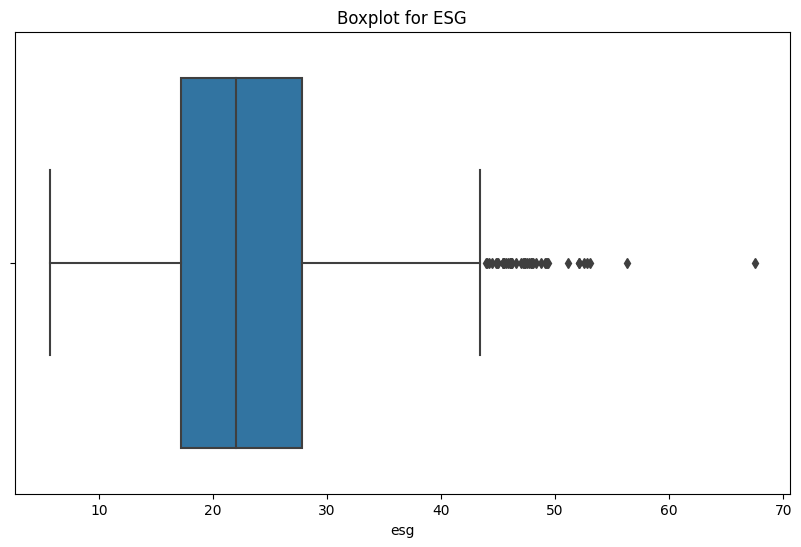

In [150]:
#BoxPlot

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution and potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df3['esg'])
plt.title("Boxplot for ESG")
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


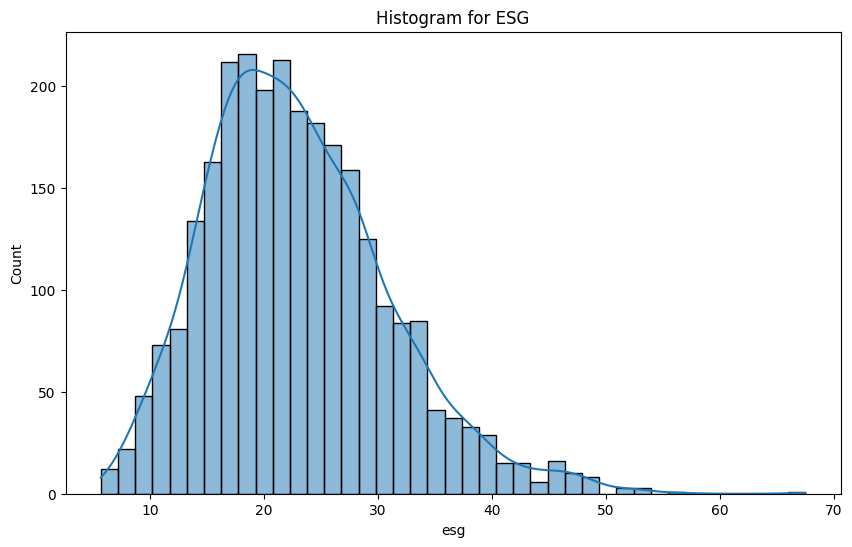

In [151]:
#Histogram

# Histogram to visualize the distribution of the 'esg' column
plt.figure(figsize=(10, 6))
sns.histplot(df3['esg'], kde=True)
plt.title("Histogram for ESG")
plt.show()


#### Capping the Outliers

#### Instead of removing the outliers, you can "cap" them by replacing extreme values with a specified upper or lower bound. This helps maintain all the data points while limiting the impact of outliers.



In [10]:
# Check the summary statistics before clipping
print(df3['esg'].describe())

# Calculate IQR for the 'esg' column
Q1 = df3['esg'].quantile(0.25)
Q3 = df3['esg'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the 'esg' column (replace values outside bounds with the bound values)
df3['esg'] = df3['esg'].clip(lower=lower_bound, upper=upper_bound)

# Check the summary statistics after clipping
print(df3['esg'].describe())


count    2676.000000
mean       22.963004
std         8.024950
min         5.700000
25%        17.200000
50%        22.000000
75%        27.800000
max        67.500000
Name: esg, dtype: float64
count    2676.000000
mean       22.888117
std         7.790681
min         5.700000
25%        17.200000
50%        22.000000
75%        27.800000
max        43.700000
Name: esg, dtype: float64


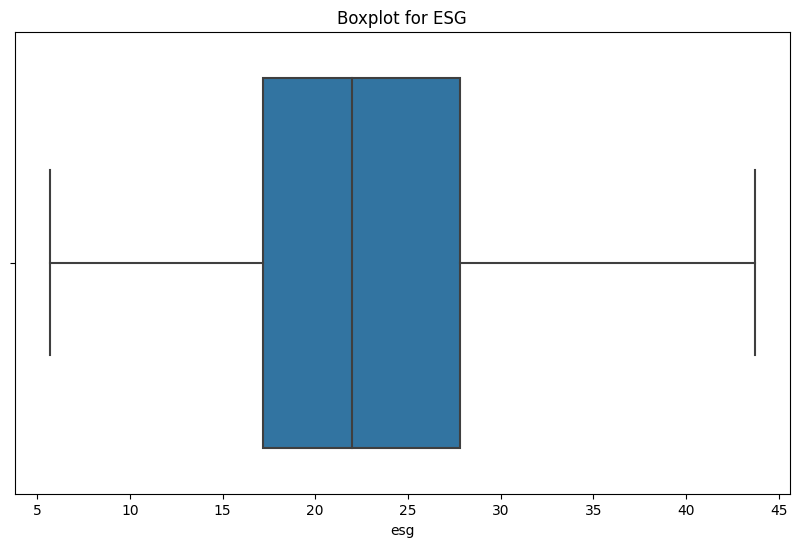

In [154]:
#BoxPlot

import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize the distribution and potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df3['esg'])
plt.title("Boxplot for ESG")
plt.show()


## **Scaling** 

In [11]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Identify numerical columns
numeric_columns = df3.select_dtypes(include=['int64']).columns

# Step 2: Scale only the numerical columns
scaler = StandardScaler()  # You can use MinMaxScaler instead if preferred
df3_scaled = df3.copy()  # Create a copy of the dataframe to avoid modifying the original

# Apply scaling to the numerical columns
df3_scaled[numeric_columns] = scaler.fit_transform(df3_scaled[numeric_columns])

# Check the scaled dataframe
df3_scaled.head()


,name,ticker,involvement.Animal Testing,involvement.Military Contracting,industry,sector,Controversies.Environment,Controversies.Social,Controversies.Customers,Controversies.Human Rights & Community,...,Controversies.Toxic Emissions & Waste,Controversies.Impact on Local Communities,Controversies.Biodiversity & Land Use,Controversies.Other,Controversies.Marketing & Advertising,Controversies.Civil Liberties,Controversies.Operational Waste (Non-Hazardous),Controversies.Water Stress,Controversies.Child Labor,Controversies.Controversial Investments
0,F5 Networks,FFIV,0.033501,0.019335,Software - Infrastructure,Technology,0.133853,0.388775,0.285724,0.164312,...,0.012227,0.091235,0.044967,-0.019335,0.0,-0.033501,0.019335,0.019335,-0.033501,0.033501
1,Dell,DELL,0.033501,0.019335,Computer Hardware,Technology,0.133853,-1.639222,0.285724,0.164312,...,0.012227,0.091235,0.044967,-0.019335,0.0,-0.033501,0.019335,0.019335,-0.033501,0.033501
4,Hewlett Packard,HPQ,-29.849623,0.019335,Computer Hardware,Technology,0.133853,-1.639222,0.285724,0.164312,...,0.012227,0.091235,0.044967,-0.019335,0.0,-0.033501,0.019335,0.019335,-0.033501,0.033501
5,IBM,IBM,0.033501,0.019335,Information Technology Services,Technology,0.133853,-3.667219,0.285724,0.164312,...,0.012227,0.091235,0.044967,-0.019335,0.0,-0.033501,0.019335,0.019335,-0.033501,0.033501
6,Juniper Networks,JNPR,0.033501,0.019335,Communication Equipment,Technology,0.133853,0.388775,0.285724,0.164312,...,0.012227,0.091235,0.044967,-0.019335,0.0,-0.033501,0.019335,0.019335,-0.033501,0.033501


### **=> Cleaned Dataset**

## **PCA**

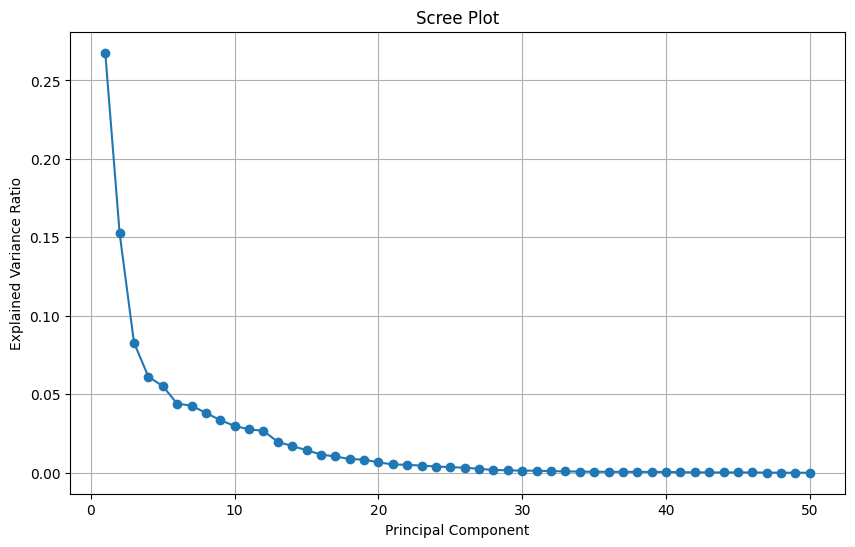

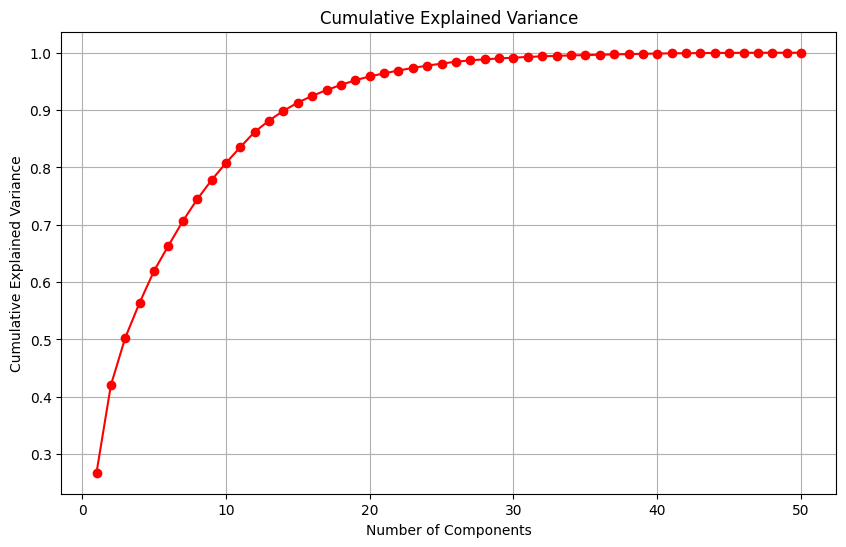

In [46]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exclude categorical columns and the 'esg' column
exclude_cols = ['esg'] + list(df3.select_dtypes(include='object').columns)
numerical_data = df3.drop(columns=exclude_cols)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(numerical_data)

# Explained variance ratios
explained_variance = pca.explained_variance_ratio_

# Scree plot to visualize explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='red')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Create a DataFrame of the PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(len(explained_variance))])


#### Overall insights:

#### To retain 80% of the cumulative variance, we need to keep about the first 10 compenents for analysis

### **Eigenvalues**

Eigenvalues: [5.11284072e-01 2.91466074e-01 1.58280455e-01 1.16843852e-01
 1.05466419e-01 8.40922501e-02 8.16392268e-02 7.28058944e-02
 6.40051870e-02 5.70060670e-02 5.27964287e-02 5.09469704e-02
 3.75584110e-02 3.24739150e-02 2.74866678e-02 2.21434153e-02
 1.97567631e-02 1.67091417e-02 1.59585016e-02 1.25950082e-02
 1.00968195e-02 9.61479157e-03 8.64306019e-03 7.57328419e-03
 6.81104427e-03 6.15396611e-03 4.73934876e-03 3.39114196e-03
 2.89894470e-03 2.53253316e-03 2.49203524e-03 1.89236070e-03
 1.69478090e-03 1.38676514e-03 1.21320091e-03 1.08746798e-03
 1.07838296e-03 1.04164423e-03 9.78205913e-04 9.49962511e-04
 6.08052126e-04 5.10832755e-04 3.70619891e-04 3.54488042e-04
 3.33262262e-04 2.98936607e-04 1.52143205e-04 3.83817335e-05
 1.81095025e-32 3.13345621e-33]
Total Variance: 1.9102511769554198


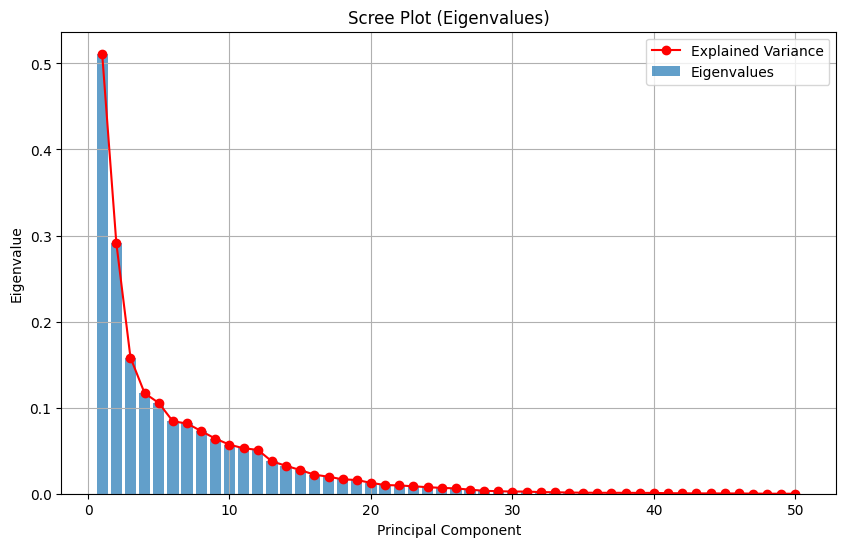

In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exclude categorical columns and the 'esg' column
exclude_cols = ['esg'] + list(df3.select_dtypes(include='object').columns)
numerical_data = df3.drop(columns=exclude_cols)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(numerical_data)

# Eigenvalues (variance explained by each component)
eigenvalues = pca.explained_variance_

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Total variance (sum of eigenvalues)
total_variance = sum(eigenvalues)

# Display eigenvalues
print("Eigenvalues:", eigenvalues)
print("Total Variance:", total_variance)

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7, label='Eigenvalues')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * total_variance, marker='o', color='r', label='Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot (Eigenvalues)')
plt.legend()
plt.grid(True)
plt.show()


#### No principle compenent has an eigenvalue higher than 1

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df3' is your dataset, and 'esg' is the column to exclude
# Select only numerical columns excluding 'esg'
numerical_columns = df3.select_dtypes(include=['number']).drop(columns=['esg']).columns
numerical_data = df3[numerical_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply PCA
n_components = 10  # Choose the number of components you want to retain
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA-transformed data
pca_columns = [f'PC{i + 1}' for i in range(n_components)]
pca_df = pd.DataFrame(pca_data, columns=pca_columns)

# Step 3: Select the additional columns you want to include
additional_columns = df3[['name', 'ticker', 'industry', 'sector', 'esg']]

# Step 4: Concatenate the PCA data with the additional columns
final_df = pd.concat([pca_df, additional_columns.reset_index(drop=True)], axis=1)


# Save the PCA-transformed dataset as a copy
pca_copy = final_df.copy()

# Print the new dataset
pca_copy.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,name,ticker,industry,sector,esg
0,-0.001479,-0.127184,-0.973697,-0.406581,-0.400045,-0.130612,-0.238156,0.246435,-0.454657,0.514954,F5 Networks,FFIV,Software - Infrastructure,Technology,17.2
1,-0.187885,4.156629,-3.050441,-0.681554,-3.185426,-0.430515,0.577498,0.780984,0.458025,-0.650623,Dell,DELL,Computer Hardware,Technology,14.4
2,-0.179180,3.028710,0.531021,-0.625831,0.147470,-3.005322,-1.903831,-1.142211,4.882585,1.922726,Hewlett Packard,HPQ,Computer Hardware,Technology,12.3
3,-2.388954,4.186464,0.132308,3.415193,-3.176409,2.398732,5.447403,-0.600410,1.413688,2.255545,IBM,IBM,Information Technology Services,Technology,14.1
4,0.031162,0.887871,-1.889219,-0.705995,-0.393709,0.232843,-0.265259,0.107038,0.102731,0.859368,Juniper Networks,JNPR,Communication Equipment,Technology,14.5


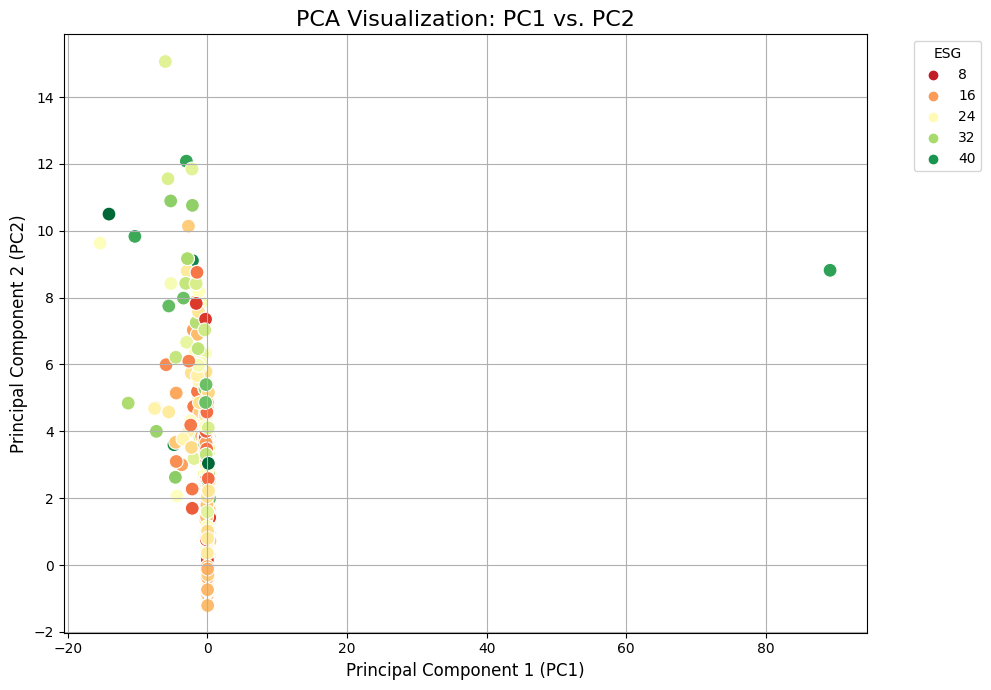

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ESG values for color coding
esg_values = pca_copy['esg']

# Normalize ESG values for color mapping (optional, to ensure range)
norm = plt.Normalize(vmin=esg_values.min(), vmax=esg_values.max())

# Create a scatter plot for the first two principal components
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=pca_copy['PC1'],
    y=pca_copy['PC2'],
    hue=esg_values,  # Use 'esg' to color-code points
    palette='RdYlGn',  # Red to Green color palette (red = low ESG, green = high ESG)
    s=100,  # Marker size
    hue_norm=(esg_values.min(), esg_values.max())  # Normalize hue scale
)

# Add titles and labels
plt.title('PCA Visualization: PC1 vs. PC2', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='ESG', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### Interpretation:

### Variance Representation:

### All data points align closely around zero on the first principal component (PC1), except for a single outlier. 
### For the second principal component (PC2), higher values correspond to higher ESG scores, with a slight leftward tilt along PC1.

### ESG Score Insights:

### The color gradient indicates that the data is evenly distributed, ensuring representation across all ESG score ranges.. 

### Outlier Analysis:

### The outlier with a high ESG score may represent a company that excels in ESG metrics but does not align with the broader trends observed in the dataset. 

### TSNE Using PCA dataset

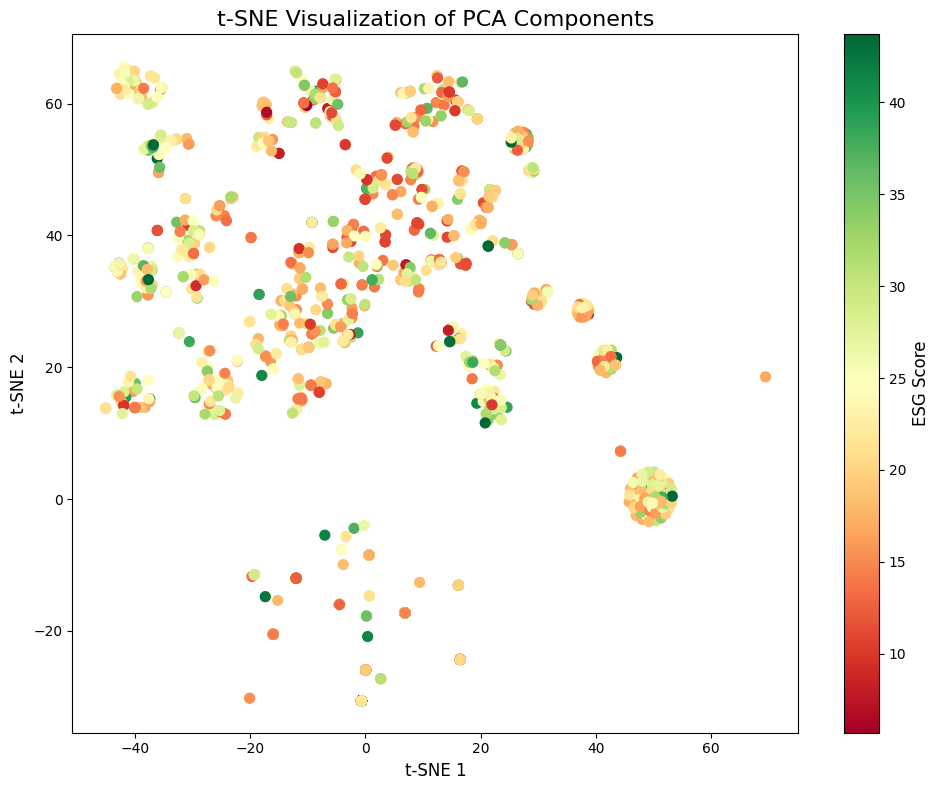

In [51]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract the PCA components (excluding 'name', 'ticker', 'industry', 'sector', and 'esg' columns)
pca_data = pca_copy.drop(columns=['name', 'ticker', 'industry', 'sector', 'esg'])

# Apply t-SNE to reduce dimensions to 2D or 3D (here we reduce to 2D for visualization)
tsne = TSNE(n_components=2, random_state=42)  # Use 3 for 3D visualization
tsne_results = tsne.fit_transform(pca_data)

# Add the t-SNE results back to the dataframe
pca_copy['tsne_1'] = tsne_results[:, 0]
pca_copy['tsne_2'] = tsne_results[:, 1]

# Color code using ESG scores (highest = green, lowest = red)
esg_values = pca_copy['esg']

# Create a 2D scatter plot (for 3D, set n_components=3 and use Axes3D)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    pca_copy['tsne_1'], pca_copy['tsne_2'],
    c=esg_values, cmap='RdYlGn', s=50  # Color by ESG score, reversed color map (green is high, red is low)
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('ESG Score', fontsize=12)

# Add labels and title
plt.title('t-SNE Visualization of PCA Components', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


### The data points are mixed, showing no clear signs of distinct clustering.

### Using TSNE for the whole dataset

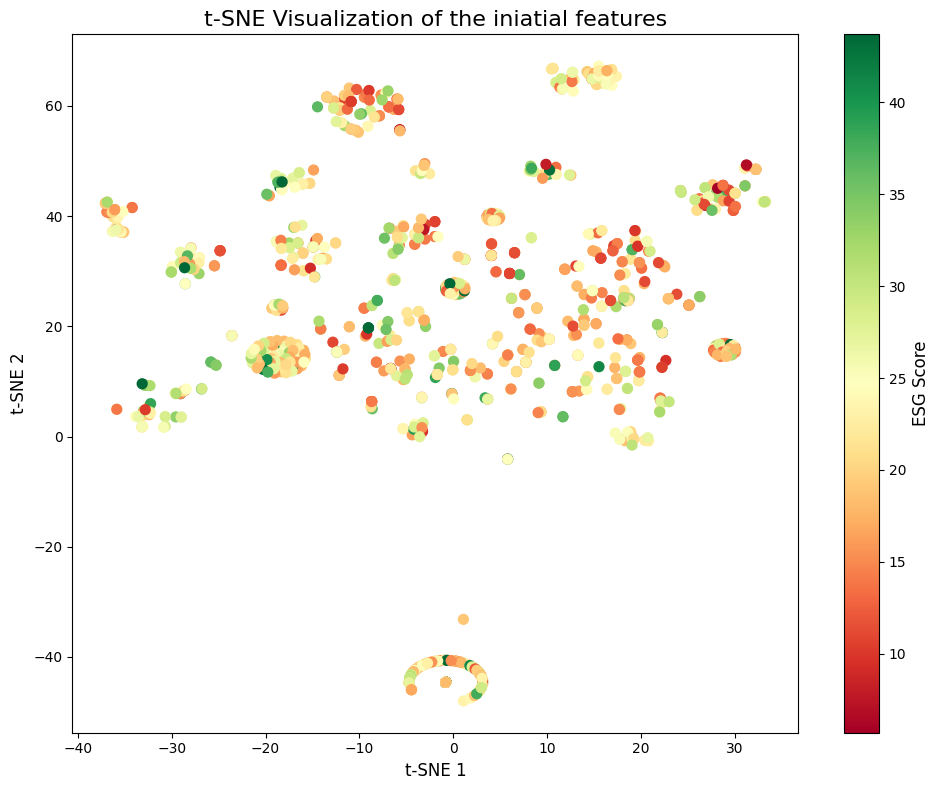

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Extract the PCA components (excluding 'name', 'ticker', 'industry', 'sector', and 'esg' columns)
df3_copy = df3_scaled.drop(columns=[ 'name', 'ticker', 'industry', 'sector', 'esg'])

# Apply t-SNE to reduce dimensions to 2D or 3D (here we reduce to 2D for visualization)
tsne = TSNE(n_components=2, random_state=42)  # Use 3 for 3D visualization
tsne_results = tsne.fit_transform(df3_copy)

# Add the t-SNE results back to the dataframe
df3_copy['tsne_1'] = tsne_results[:, 0]
df3_copy['tsne_2'] = tsne_results[:, 1]

# Color code using ESG scores (highest = green, lowest = red)
esg_values = df3_scaled['esg']

# Create a 2D scatter plot (for 3D, set n_components=3 and use Axes3D)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    df3_copy['tsne_1'], df3_copy['tsne_2'],
    c=esg_values, cmap='RdYlGn', s=50  # Color by ESG score, reversed color map (green is high, red is low)
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('ESG Score', fontsize=12)

# Add labels and title
plt.title('t-SNE Visualization of the iniatial features', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=12)
plt.ylabel('t-SNE 2', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Modeling

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import xgboost as xgbcx
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree


In [104]:
#pip install xgboost


Note: you may need to restart the kernel to use updated packages.


#### Splitting the data

In [12]:
# Define y as the target variable
y = df3_scaled['esg']

# Select numerical columns for X, excluding the target column 'esg'
X = df3_scaled.drop(columns=['esg']).select_dtypes(include=['number'])

# Check the shapes of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2676, 50)
y shape: (2676,)


In [13]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBoost

In [14]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Step 3: Initialize and train the XGBoost regressor
model_xgb = xgb.XGBRegressor(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # Step size shrinkage
    max_depth=5,            # Maximum depth of a tree
    subsample=0.8,          # Subsample ratio of the training data
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Use early stopping with validation set
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    early_stopping_rounds=10,
    verbose=True
)

[0]	validation_0-rmse:7.84021
[1]	validation_0-rmse:7.81252
[2]	validation_0-rmse:7.79776
[3]	validation_0-rmse:7.78535
[4]	validation_0-rmse:7.77366
[5]	validation_0-rmse:7.76178
[6]	validation_0-rmse:7.74822
[7]	validation_0-rmse:7.74403
[8]	validation_0-rmse:7.72754
[9]	validation_0-rmse:7.72049
[10]	validation_0-rmse:7.71821
[11]	validation_0-rmse:7.71168
[12]	validation_0-rmse:7.70377
[13]	validation_0-rmse:7.69054
[14]	validation_0-rmse:7.68356
[15]	validation_0-rmse:7.67236
[16]	validation_0-rmse:7.67207
[17]	validation_0-rmse:7.67118
[18]	validation_0-rmse:7.67207
[19]	validation_0-rmse:7.66943
[20]	validation_0-rmse:7.67096
[21]	validation_0-rmse:7.67355
[22]	validation_0-rmse:7.67007
[23]	validation_0-rmse:7.66792
[24]	validation_0-rmse:7.66869
[25]	validation_0-rmse:7.66307
[26]	validation_0-rmse:7.66573
[27]	validation_0-rmse:7.66430
[28]	validation_0-rmse:7.66261
[29]	validation_0-rmse:7.66518
[30]	validation_0-rmse:7.66258
[31]	validation_0-rmse:7.65815
[32]	validation_0-

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-rmse:7.63655
[42]	validation_0-rmse:7.63621
[43]	validation_0-rmse:7.63732
[44]	validation_0-rmse:7.63322
[45]	validation_0-rmse:7.62944
[46]	validation_0-rmse:7.63013
[47]	validation_0-rmse:7.62980
[48]	validation_0-rmse:7.62789
[49]	validation_0-rmse:7.62665
[50]	validation_0-rmse:7.62215
[51]	validation_0-rmse:7.62169
[52]	validation_0-rmse:7.62063
[53]	validation_0-rmse:7.62008
[54]	validation_0-rmse:7.62022
[55]	validation_0-rmse:7.62245
[56]	validation_0-rmse:7.62048
[57]	validation_0-rmse:7.62238
[58]	validation_0-rmse:7.61972
[59]	validation_0-rmse:7.61539
[60]	validation_0-rmse:7.61609
[61]	validation_0-rmse:7.61831
[62]	validation_0-rmse:7.62122
[63]	validation_0-rmse:7.62316
[64]	validation_0-rmse:7.62515
[65]	validation_0-rmse:7.62627
[66]	validation_0-rmse:7.62551
[67]	validation_0-rmse:7.62381
[68]	validation_0-rmse:7.62427
[69]	validation_0-rmse:7.62610


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
# Step 4: Make predictions
y_pred = model_xgb.predict(X_test)

In [36]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 57.9942
Mean Absolute Error (MAE): 6.0092
Root Mean Squared Error (RMSE): 7.6154
R-squared (R2): 0.0633


### The model has a low R² value of 0.06, indicating that only 6% of the variance in the ESG scores is explained by the model. 

### The MAE of 6 suggests that the model, on average, is off by approximately 6 points in its predictions.

## **Feature Selection**

### Feature Selection using XGBoost

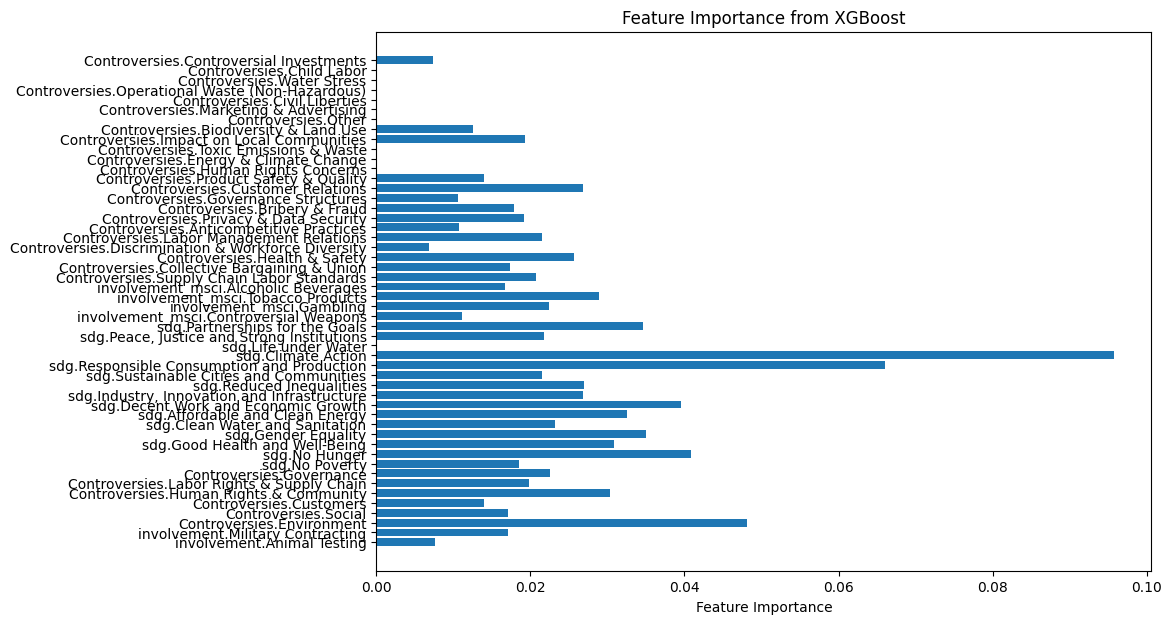

In [16]:
# Step 4: Get Feature Importance
importance = model_xgb.feature_importances_

# Step 5: Visualize Feature Importance
plt.figure(figsize=(10, 7))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()

In [17]:
# Set your threshold
threshold = 0.04

# Get the feature names from your DataFrame (make sure X corresponds to the correct features)
feature_names = X.columns

# Filter features based on the threshold
selected_features = feature_names[importance > threshold]

# Print the selected features
print("Selected features with importance above the threshold:")
print(selected_features)

Selected features with importance above the threshold:
Index(['Controversies.Environment', 'sdg.No Hunger',
       'sdg.Responsible Consumption and Production', 'sdg.Climate Action'],
      dtype='object')


In [18]:
# Create a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance Score': importance
})

# Filter the features with importance greater than the threshold
selected_features_xgb = importance_df[importance_df['Importance Score'] > threshold]

# Sort by importance score in descending order
selected_features_xgb = selected_features_xgb.sort_values(by='Importance Score', ascending=False)

# Print the selected features and their importance scores
print("Features with importance above the threshold:")
print(selected_features_xgb)

Features with importance above the threshold:
                                       Feature  Importance Score
19                          sdg.Climate Action          0.095811
18  sdg.Responsible Consumption and Production          0.066065
2                    Controversies.Environment          0.048099
9                                sdg.No Hunger          0.040824


In [40]:
selected_features_xgb.head()

,Feature,Importance Score
19,sdg.Climate Action,0.095811
18,sdg.Responsible Consumption and Production,0.066065
2,Controversies.Environment,0.048099
9,sdg.No Hunger,0.040824


In [103]:
selected_features_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 19 to 9
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Feature           4 non-null      object 
 1   Importance Score  4 non-null      float32
dtypes: float32(1), object(1)
memory usage: 80.0+ bytes


### Feature Selection using **RFE**

In [19]:
from sklearn.feature_selection import RFE


# Step 3: Initialize RFE with the model
rfe = RFE(estimator=model_xgb, n_features_to_select=5)  # You can change n_features_to_select

# Step 4: Fit the RFE model
rfe.fit(X, y)

# Step 5: Get the selected features
selected_features_rfe = X.columns[rfe.support_]
# Step 6: Show selected features
print(f"Selected Features: {selected_features_rfe}")

# You can also see the ranking of each feature
ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_}).sort_values(by='Ranking')
print(ranking)

Selected Features: Index(['Controversies.Environment', 'Controversies.Human Rights & Community',
       'sdg.Sustainable Cities and Communities',
       'sdg.Responsible Consumption and Production', 'sdg.Climate Action'],
      dtype='object')
                                              Feature  Ranking
2                           Controversies.Environment        1
19                                 sdg.Climate Action        1
18         sdg.Responsible Consumption and Production        1
5              Controversies.Human Rights & Community        1
17             sdg.Sustainable Cities and Communities        1
11                                sdg.Gender Equality        2
12                     sdg.Clean Water and Sanitation        3
9                                       sdg.No Hunger        4
24                          involvement_msci.Gambling        5
13                    sdg.Affordable and Clean Energy        6
10                     sdg.Good Health and Well-Being        7


In [20]:
# Step 6: Print only the features with ranking 1
print(f"Selected Features (Ranking = 1): {selected_features_rfe}")

Selected Features (Ranking = 1): Index(['Controversies.Environment', 'Controversies.Human Rights & Community',
       'sdg.Sustainable Cities and Communities',
       'sdg.Responsible Consumption and Production', 'sdg.Climate Action'],
      dtype='object')


In [21]:
selected_features_rfe_df = pd.DataFrame(selected_features_rfe, columns=["Feature"])
selected_features_rfe_df.head()


,Feature
0,Controversies.Environment
1,Controversies.Human Rights & Community
2,sdg.Sustainable Cities and Communities
3,sdg.Responsible Consumption and Production
4,sdg.Climate Action


### Combined Features between  XGBOOST & RFE

In [22]:
# Step 1: Combine selected features from both XGBoost and RFE
combined_features = pd.concat([selected_features_xgb['Feature'], selected_features_rfe_df['Feature']])

# Step 2: Keep only unique features
unique_features = combined_features.unique()

unique_features

array(['sdg.Climate Action', 'sdg.Responsible Consumption and Production',
       'Controversies.Environment', 'sdg.No Hunger',
       'Controversies.Human Rights & Community',
       'sdg.Sustainable Cities and Communities'], dtype=object)

### **TSNE Plotting using Combined Feature dataframe**

/tmp/ipykernel_30/2445050168.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # Label ranges for interpretability


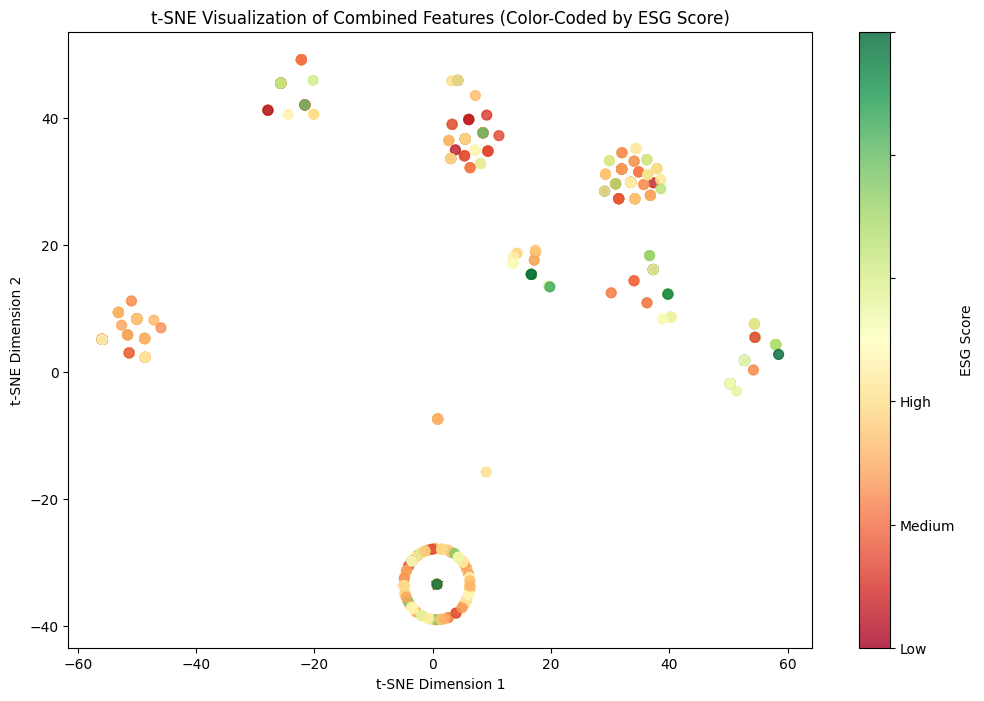

In [73]:
# Step 3: Subset the original DataFrame with the unique features
df_unique_features = df3_scaled[unique_features]  # Assuming df3 is your original DataFrame
esg_scores = df3_scaled['esg']  # Target column for color coding

# Step 4: Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df_unique_features)

# Step 5: Normalize ESG scores for color mapping (optional for smooth color transitions)
normalized_esg = (esg_scores - esg_scores.min()) / (esg_scores.max() - esg_scores.min())

# Step 6: Plot t-SNE results with color-coded ESG scores
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                       c=normalized_esg, cmap='RdYlGn', s=50, alpha=0.8)

# Add color bar
colorbar = plt.colorbar(scatter, label='ESG Score')
colorbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # Label ranges for interpretability

plt.title("t-SNE Visualization of Combined Features (Color-Coded by ESG Score)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

### Clusters are visible, but the data points are mostly mixed, except for one distinct cluster at the far left of PC1 and near 0 for PC2, corresponding to low ESG scores.

### Commun Features between  XGBOOST & RFE

In [108]:
common_features_list = list(set(selected_features_rfe_df['Feature']) & set(selected_features_xgb['Feature']))
print(common_features_list)


['sdg.Climate Action', 'sdg.Responsible Consumption and Production', 'Controversies.Environment']


/tmp/ipykernel_30/2803923663.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  colorbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # Label ranges for interpretability


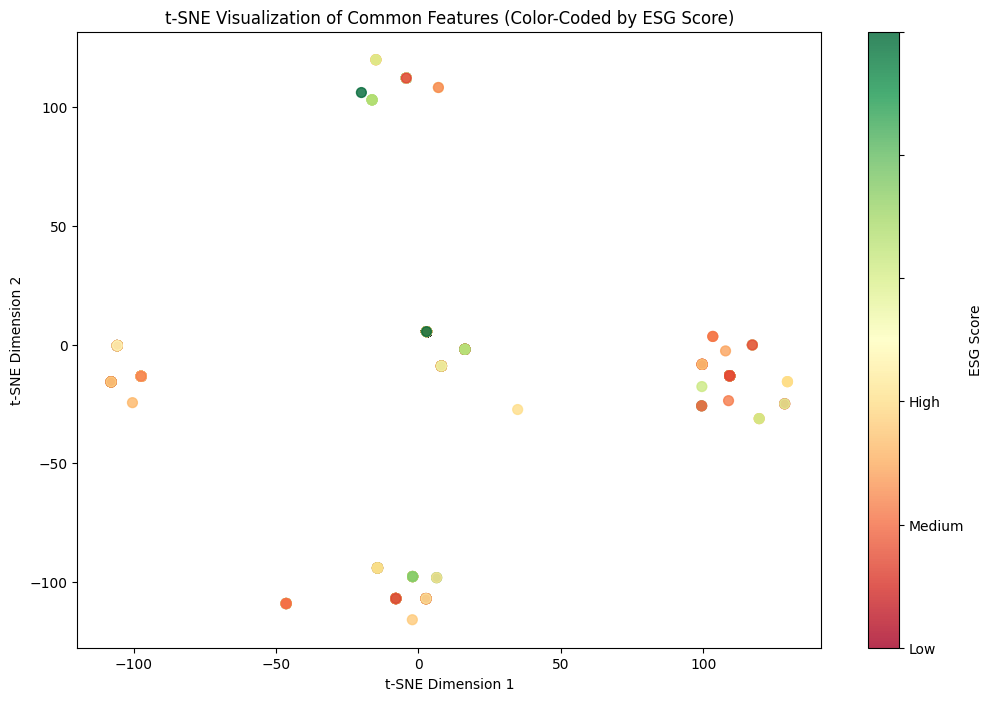

In [72]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: Subset data to include common features and the ESG column
df_common_features = df3_scaled[common_features_list]  # Use only common features
esg_scores = df3_scaled['esg']  # Target column for color coding

# Step 2: Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(df_common_features)

# Step 3: Normalize ESG scores for color mapping (optional for smooth color transitions)
normalized_esg = (esg_scores - esg_scores.min()) / (esg_scores.max() - esg_scores.min())

# Step 4: Plot t-SNE results with color-coded ESG scores
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                       c=normalized_esg, cmap='RdYlGn', s=50, alpha=0.8)

# Add color bar
colorbar = plt.colorbar(scatter, label='ESG Score')
colorbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # Label ranges for interpretability

plt.title("t-SNE Visualization of Common Features (Color-Coded by ESG Score)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


### The visualizations show that the data points are not forming any clear clusters or groupings, this suggests that the features do not have strong, noticeable patterns or relationships that would naturally separate the data into distinct clusters.

## **Creating a new Dataframe using combination of selected features using RFE & XGBOOST**

In [23]:
import pandas as pd

# Your array of selected features
selected_features = np.array(['sdg.Climate Action', 'sdg.Responsible Consumption and Production',
       'Controversies.Environment', 'sdg.No Hunger',
       'Controversies.Human Rights & Community',
       'sdg.Sustainable Cities and Communities'])

# Assuming df3_scaled is your original DataFrame, and it contains the features
# Create a new DataFrame with only the selected features
df_selected_features = df3_scaled[selected_features]

# Optionally, if you want to include the target variable 'esg' too:
df_selected_features_with_target = df_selected_features.copy()
df_selected_features_with_target['esg'] = df3_scaled['esg']  # Adding the target variable

# Show the new DataFrame
df_selected_features_with_target.head()


,sdg.Climate Action,sdg.Responsible Consumption and Production,Controversies.Environment,sdg.No Hunger,Controversies.Human Rights & Community,sdg.Sustainable Cities and Communities,esg
0,-0.353734,2.699135,0.133853,-0.107852,0.164312,-0.154008,17.2
1,2.689969,2.699135,0.133853,-0.107852,0.164312,-0.154008,14.4
4,2.689969,-0.307895,0.133853,-0.107852,0.164312,-0.154008,12.3
5,2.689969,2.699135,0.133853,-0.107852,0.164312,-0.154008,14.1
6,-0.353734,2.699135,0.133853,-0.107852,0.164312,-0.154008,14.5


### **Correlation Matrix of the combined Features**

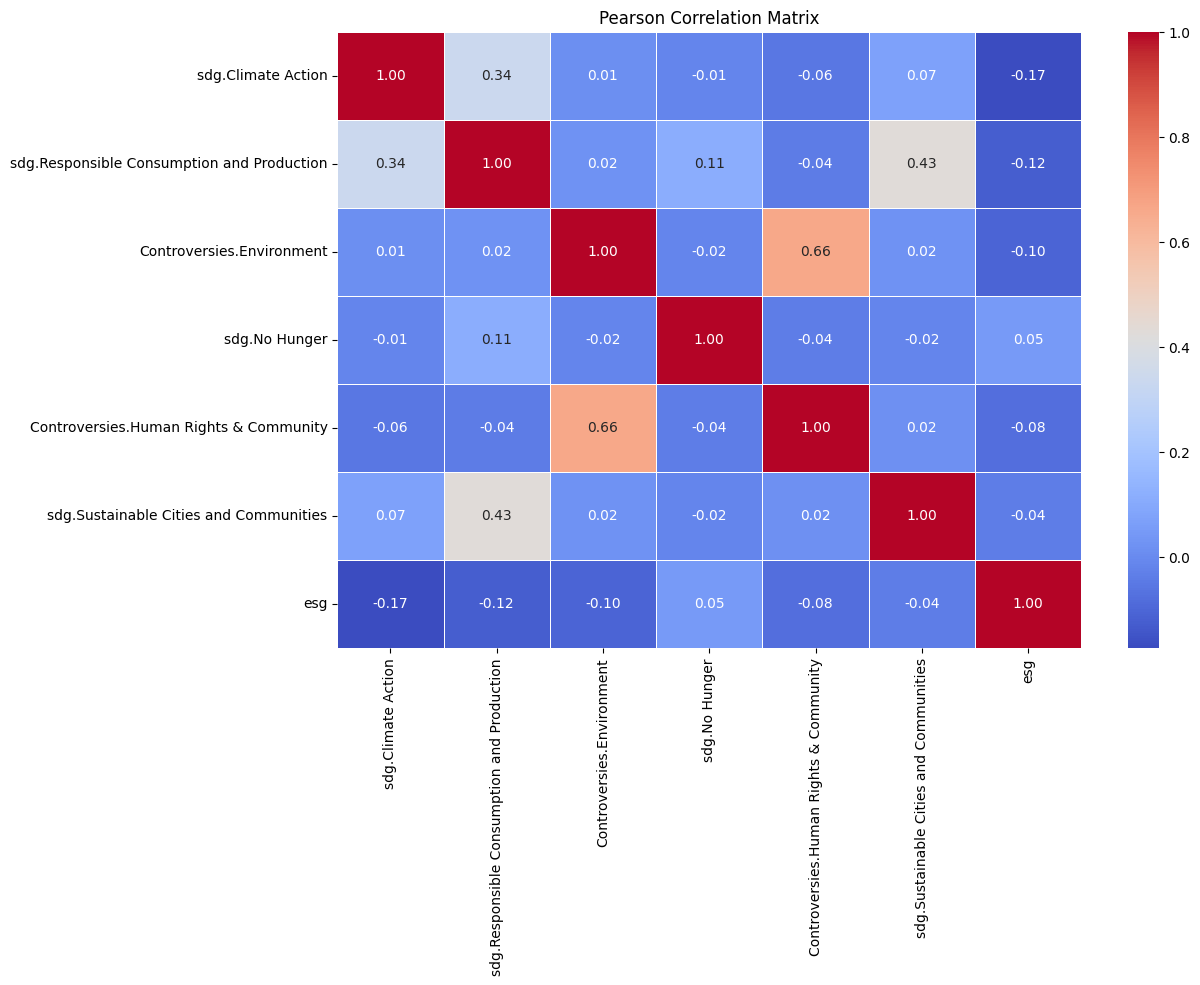

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_selected_features_with_target is your DataFrame
correlation_matrix = df_selected_features_with_target.corr(method='pearson')

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()


### I can observe a moderate correlation of 0.66 between the columns 'Controversies.Environment' and 'Controversies.Human Rights & Community'.

## Splitting the New Dataset with only combined features

In [24]:
# Define y as the target variable
y = df_selected_features_with_target['esg']

# Select numerical columns for X, excluding the target column 'esg'
X = df_selected_features_with_target.drop(columns=['esg']).select_dtypes(include=['number'])

# Check the shapes of X and y
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (2676, 6)
y shape: (2676,)


In [60]:
from sklearn.model_selection import train_test_split


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### XGBOOST again

In [113]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score


# Step 3: Initialize and train the XGBoost regressor
model_xgb = xgb.XGBRegressor(
    n_estimators=100,       # Number of trees
    learning_rate=0.1,      # Step size shrinkage
    max_depth=5,            # Maximum depth of a tree
    subsample=0.8,          # Subsample ratio of the training data
    colsample_bytree=0.8,   # Subsample ratio of columns when constructing each tree
    random_state=42
)

# Use early stopping with validation set
model_xgb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric="rmse",
    early_stopping_rounds=10,
    verbose=True
) 

[0]	validation_0-rmse:7.85689
[1]	validation_0-rmse:7.83204
[2]	validation_0-rmse:7.81847
[3]	validation_0-rmse:7.79713
[4]	validation_0-rmse:7.77906
[5]	validation_0-rmse:7.76462
[6]	validation_0-rmse:7.76259
[7]	validation_0-rmse:7.75229
[8]	validation_0-rmse:7.73919
[9]	validation_0-rmse:7.73438
[10]	validation_0-rmse:7.73048
[11]	validation_0-rmse:7.72533
[12]	validation_0-rmse:7.72020
[13]	validation_0-rmse:7.71608
[14]	validation_0-rmse:7.71067
[15]	validation_0-rmse:7.70839
[16]	validation_0-rmse:7.70207
[17]	validation_0-rmse:7.69599
[18]	validation_0-rmse:7.69097
[19]	validation_0-rmse:7.69113
[20]	validation_0-rmse:7.68825
[21]	validation_0-rmse:7.68840
[22]	validation_0-rmse:7.68752
[23]	validation_0-rmse:7.68615
[24]	validation_0-rmse:7.68634
[25]	validation_0-rmse:7.68547
[26]	validation_0-rmse:7.68707
[27]	validation_0-rmse:7.68666
[28]	validation_0-rmse:7.68618
[29]	validation_0-rmse:7.68518
[30]	validation_0-rmse:7.68365
[31]	validation_0-rmse:7.68441
[32]	validation_0-

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:7.67402
[49]	validation_0-rmse:7.67303
[50]	validation_0-rmse:7.67296
[51]	validation_0-rmse:7.67270
[52]	validation_0-rmse:7.67190
[53]	validation_0-rmse:7.67184
[54]	validation_0-rmse:7.67152
[55]	validation_0-rmse:7.67346
[56]	validation_0-rmse:7.67111
[57]	validation_0-rmse:7.67014
[58]	validation_0-rmse:7.67129
[59]	validation_0-rmse:7.67168
[60]	validation_0-rmse:7.67277
[61]	validation_0-rmse:7.67213
[62]	validation_0-rmse:7.67560
[63]	validation_0-rmse:7.67366
[64]	validation_0-rmse:7.67220
[65]	validation_0-rmse:7.67282
[66]	validation_0-rmse:7.67258


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [116]:
y_pred = model_xgb.predict(X_test)

In [117]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 58.8310
Mean Absolute Error (MAE): 6.1505
Root Mean Squared Error (RMSE): 7.6701
R-squared (R2): 0.0498


### Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [109]:
# Predict on the test set
y_pred = rf_model.predict(X_test)


In [110]:
# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Explained Variance: {explained_variance:.4f}")


Mean Squared Error (MSE): 60.1731
Mean Absolute Error (MAE): 6.1705
Root Mean Squared Error (RMSE): 7.7571
R-squared (R2): 0.0282
Explained Variance: 0.0306


### The MAE of 5.86 suggests that, on average, the predicted ESG scores are off by about 5.86 units from the actual ESG scores.

### R2 indicates that the model is able to explain about 8.32% of the variance in the ESG scores.

### KNN

In [118]:
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsRegressor(n_neighbors=5)  # You can experiment with different n_neighbors values
knn.fit(X_train, y_train)

# Step 6: Make Predictions and Evaluate the Model
y_pred = knn.predict(X_test)

In [119]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print(f"Explained Variance: {explained_variance:.4f}")

Mean Squared Error (MSE): 83.1551
Mean Absolute Error (MAE): 6.9153
Root Mean Squared Error (RMSE): 9.1189
R-squared (R2): -0.3430
Explained Variance: -0.0728


### Neural Network

In [122]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Step 4: Build the neural network model
model = Sequential()

# Add input layer with the same number of neurons as features
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer (single neuron for regression output)
model.add(Dense(units=1))

# Step 5: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 547.1334 - val_loss: 411.4166
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 328.5092 - val_loss: 61.4806
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.4615 - val_loss: 59.3090
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.6634 - val_loss: 59.0634
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.8363 - val_loss: 59.1203
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.6439 - val_loss: 58.9181
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62.6649 - val_loss: 59.7978
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.1824 - val_loss: 59.0013
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.4445 - val_loss: 58.9954
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.9753 - val_loss: 59.5887
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 57.0751 - val_loss: 59.6073
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━

In [124]:
# Step 8: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 60.5170
Mean Absolute Error (MAE): 6.1505
Root Mean Squared Error (RMSE): 7.7793
R-squared (R2): 0.0226


## **Apply KFold Cross-Validation for each of my models**

In [128]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

# Initialize your models
models = {
    'KNN': KNeighborsRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Neural Network': MLPRegressor(max_iter=1000),
    'SVR': SVR()
}

# Apply cross-validation for each model
results = {}
for name, model in models.items():
    # Apply 5-fold cross-validation and evaluate R^2 score
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    results[name] = cv_scores
    print(f"{name} - Cross-validation R^2 scores: {cv_scores}")
    print(f"{name} - Mean R^2: {cv_scores.mean():.4f}")
    print(f"{name} - Standard Deviation of R^2: {cv_scores.std():.4f}")


KNN - Cross-validation R^2 scores: [-0.03371925 -0.20886854 -0.33991054 -0.62512421 -0.58550995]
KNN - Mean R^2: -0.3586
KNN - Standard Deviation of R^2: 0.2240
XGBoost - Cross-validation R^2 scores: [ 0.00313204  0.03519913  0.04206166  0.04307991 -0.04972884]
XGBoost - Mean R^2: 0.0147
XGBoost - Standard Deviation of R^2: 0.0354
Random Forest - Cross-validation R^2 scores: [ 0.00294731  0.03621636  0.04523327  0.04552789 -0.04925084]
Random Forest - Mean R^2: 0.0161
Random Forest - Standard Deviation of R^2: 0.0362
Neural Network - Cross-validation R^2 scores: [ 0.01010744  0.03798013  0.0453453   0.02502928 -0.05862472]
Neural Network - Mean R^2: 0.0120
Neural Network - Standard Deviation of R^2: 0.0373
SVR - Cross-validation R^2 scores: [ 0.04287414  0.05889393  0.03604594 -0.01048008 -0.10866169]
SVR - Mean R^2: 0.0037
SVR - Standard Deviation of R^2: 0.0608


## **Grey Wolf Optimizer**

### **Grey Wolf Optimizer for XGBOOST**

In [137]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# Define the Grey Wolf Optimizer (GWO) class
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, population_size=30, max_iterations=50):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.population_size = population_size
        self.max_iterations = max_iterations

    def optimize(self):
        # Initialize the population of grey wolves (random solutions)
        population = np.random.uniform(self.lb, self.ub, (self.population_size, len(self.lb)))
        fitness = np.array([self.objective_function(ind) for ind in population])

        # Initialize alpha, beta, and delta wolves (best positions)
        alpha_pos = population[np.argmin(fitness)]
        alpha_score = np.min(fitness)
        beta_pos = population[np.argsort(fitness)[1]]
        beta_score = fitness[np.argsort(fitness)[1]]
        delta_pos = population[np.argsort(fitness)[2]]
        delta_score = fitness[np.argsort(fitness)[2]]

        # Main loop of the optimizer
        for _ in range(self.max_iterations):
            a = 2 - _ * (2 / self.max_iterations)  # Decreasing a from 2 to 0
            
            # Update positions and calculate new fitness scores
            for i in range(self.population_size):
                r1, r2 = np.random.rand(2)
                A = 2 * a * r1 - a  # Coefficient A
                C = 2 * r2  # Coefficient C
                D_alpha = C * (alpha_pos - population[i])  # Distance to alpha
                D_beta = C * (beta_pos - population[i])  # Distance to beta
                D_delta = C * (delta_pos - population[i])  # Distance to delta
                population[i] = population[i] + A * (D_alpha + D_beta + D_delta)  # Update position
                
                # Ensure the positions stay within the boundaries
                population[i] = np.clip(population[i], self.lb, self.ub)

                # Evaluate the fitness of the new position
                fitness[i] = self.objective_function(population[i])

            # Update the positions of alpha, beta, and delta wolves
            sorted_indices = np.argsort(fitness)
            alpha_pos = population[sorted_indices[0]]
            alpha_score = fitness[sorted_indices[0]]
            beta_pos = population[sorted_indices[1]]
            beta_score = fitness[sorted_indices[1]]
            delta_pos = population[sorted_indices[2]]
            delta_score = fitness[sorted_indices[2]]

        # Return the best solution and its corresponding fitness score
        return alpha_pos, alpha_score


# Define the objective function for the Grey Wolf Optimizer (model evaluation)
def objective_function(params):
    n_estimators, max_depth, learning_rate = int(params[0]), int(params[1]), params[2]

    # Define the model with current hyperparameters
    model = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate)

    # Train-test split (80% train, 20% test)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_val, y_pred)

    # Return the MAE as the objective (to minimize)
    return mae



# Define the bounds for the hyperparameters
lb = [50, 2, 0.01]  # Lower bounds [n_estimators, max_depth, learning_rate]
ub = [500, 10, 0.3]  # Upper bounds [n_estimators, max_depth, learning_rate]

# Initialize and run the Grey Wolf Optimizer
optimizer = GreyWolfOptimizer(objective_function, lb, ub, population_size=30, max_iterations=50)
best_solution, best_score = optimizer.optimize()

# Extract best hyperparameters
best_n_estimators = int(best_solution[0])
best_max_depth = int(best_solution[1])
best_learning_rate = best_solution[2]

print(f"Best Hyperparameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}, learning_rate={best_learning_rate}")
print(f"Best MAE: {best_score}")

Best Hyperparameters: n_estimators=484, max_depth=4, learning_rate=0.064447597028911
Best MAE: 6.14246658923021


### **Re-training using XGBOOST**

In [61]:
# Define the model with the best hyperparameters
model = xgb.XGBRegressor(
    n_estimators=484,
    max_depth=4,
    learning_rate=0.064447597028911,
    objective='reg:squarederror',
    eval_metric='mae',  # Set eval_metric here
    random_state=42
)

# Train the model and collect the evaluation history
evals_result = {}
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], 
          early_stopping_rounds=50, verbose=True)

[0]	validation_0-mae:6.17762	validation_1-mae:6.34039
[1]	validation_0-mae:6.15379	validation_1-mae:6.32264
[2]	validation_0-mae:6.13192	validation_1-mae:6.30649
[3]	validation_0-mae:6.11238	validation_1-mae:6.29203
[4]	validation_0-mae:6.09424	validation_1-mae:6.27894
[5]	validation_0-mae:6.07842	validation_1-mae:6.26697
[6]	validation_0-mae:6.06429	validation_1-mae:6.25673
[7]	validation_0-mae:6.05186	validation_1-mae:6.24807
[8]	validation_0-mae:6.04065	validation_1-mae:6.24131
[9]	validation_0-mae:6.03092	validation_1-mae:6.23471
[10]	validation_0-mae:6.02130	validation_1-mae:6.22673
[11]	validation_0-mae:6.01302	validation_1-mae:6.22119
[12]	validation_0-mae:6.00515	validation_1-mae:6.21488
[13]	validation_0-mae:5.99870	validation_1-mae:6.21080
[14]	validation_0-mae:5.99242	validation_1-mae:6.20581
[15]	validation_0-mae:5.98719	validation_1-mae:6.20299
[16]	validation_0-mae:5.98179	validation_1-mae:6.19835
[17]	validation_0-mae:5.97748	validation_1-mae:6.19623
[18]	validation_0-ma

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[66]	validation_0-mae:5.91302	validation_1-mae:6.15133
[67]	validation_0-mae:5.91279	validation_1-mae:6.15108
[68]	validation_0-mae:5.91242	validation_1-mae:6.15058
[69]	validation_0-mae:5.91217	validation_1-mae:6.15038
[70]	validation_0-mae:5.91199	validation_1-mae:6.15038
[71]	validation_0-mae:5.91180	validation_1-mae:6.15016
[72]	validation_0-mae:5.91152	validation_1-mae:6.14998
[73]	validation_0-mae:5.91134	validation_1-mae:6.14977
[74]	validation_0-mae:5.91117	validation_1-mae:6.14985
[75]	validation_0-mae:5.91097	validation_1-mae:6.14956
[76]	validation_0-mae:5.91077	validation_1-mae:6.14940
[77]	validation_0-mae:5.91061	validation_1-mae:6.14948
[78]	validation_0-mae:5.91039	validation_1-mae:6.14934
[79]	validation_0-mae:5.91021	validation_1-mae:6.14920
[80]	validation_0-mae:5.91007	validation_1-mae:6.14934
[81]	validation_0-mae:5.90987	validation_1-mae:6.14921
[82]	validation_0-mae:5.90966	validation_1-mae:6.14879
[83]	validation_0-mae:5.90954	validation_1-mae:6.14878
[84]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mae', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.064447597028911,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=484, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [62]:
# Predict on the test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) on Test Set: {mae:.4f}")

# Retrieve the evaluation results
train_mae = model.evals_result()['validation_0']['mae']
test_mae = model.evals_result()['validation_1']['mae']

Mean Absolute Error (MAE) on Test Set: 6.1424


### **XGBOOST Learning Curve**

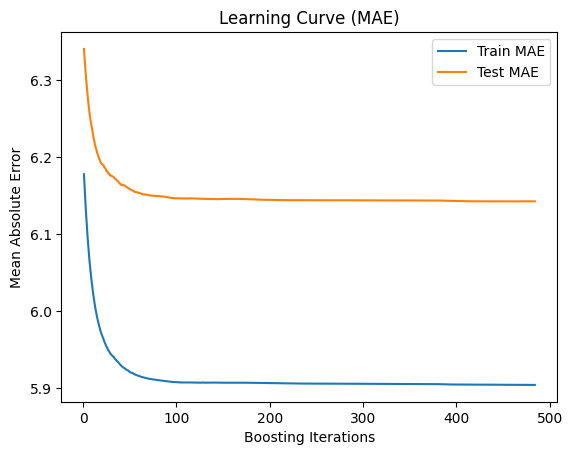

In [63]:
# Plot the learning curve (training and test MAE over iterations)
plt.plot(range(1, len(train_mae) + 1), train_mae, label='Train MAE')
plt.plot(range(1, len(test_mae) + 1), test_mae, label='Test MAE')
plt.xlabel('Boosting Iterations')
plt.ylabel('Mean Absolute Error')  # This is correct
plt.title('Learning Curve (MAE)')
plt.legend()
plt.show()

### The gap of 0.3 between training and testing MAE suggests the model may be overfitting slightly.

### Using Grey Wolf Optimizer with **Neural Network**

In [146]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


# Define the Grey Wolf Optimizer (GWO) class
class GreyWolfOptimizer:
    def __init__(self, objective_function, lb, ub, population_size=30, max_iterations=50):
        self.objective_function = objective_function
        self.lb = lb
        self.ub = ub
        self.population_size = population_size
        self.max_iterations = max_iterations

    def optimize(self):
        # Initialize the population of grey wolves (random solutions)
        population = np.random.uniform(self.lb, self.ub, (self.population_size, len(self.lb)))
        fitness = np.array([self.objective_function(ind) for ind in population])

        # Initialize alpha, beta, and delta wolves (best positions)
        alpha_pos = population[np.argmin(fitness)]
        alpha_score = np.min(fitness)
        beta_pos = population[np.argsort(fitness)[1]]
        beta_score = fitness[np.argsort(fitness)[1]]
        delta_pos = population[np.argsort(fitness)[2]]
        delta_score = fitness[np.argsort(fitness)[2]]

        # Main loop of the optimizer
        for _ in range(self.max_iterations):
            a = 2 - _ * (2 / self.max_iterations)  # Decreasing a from 2 to 0
            
            # Update positions and calculate new fitness scores
            for i in range(self.population_size):
                r1, r2 = np.random.rand(2)
                A = 2 * a * r1 - a  # Coefficient A
                C = 2 * r2  # Coefficient C
                D_alpha = C * (alpha_pos - population[i])  # Distance to alpha
                D_beta = C * (beta_pos - population[i])  # Distance to beta
                D_delta = C * (delta_pos - population[i])  # Distance to delta
                population[i] = population[i] + A * (D_alpha + D_beta + D_delta)  # Update position
                
                # Ensure the positions stay within the boundaries
                population[i] = np.clip(population[i], self.lb, self.ub)

                # Evaluate the fitness of the new position
                fitness[i] = self.objective_function(population[i])

            # Update the positions of alpha, beta, and delta wolves
            sorted_indices = np.argsort(fitness)
            alpha_pos = population[sorted_indices[0]]
            alpha_score = fitness[sorted_indices[0]]
            beta_pos = population[sorted_indices[1]]
            beta_score = fitness[sorted_indices[1]]
            delta_pos = population[sorted_indices[2]]
            delta_score = fitness[sorted_indices[2]]

        # Return the best solution and its corresponding fitness score
        return alpha_pos, alpha_score


# Define the objective function for the Grey Wolf Optimizer (model evaluation)
def objective_function(params):
    n_neurons = int(params[0])  # Number of neurons in each layer
    learning_rate = params[1]   # Learning rate
    batch_size = int(params[2])  # Batch size

    # Build the neural network model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Define input shape explicitly
    model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    # Compile the model with Adam optimizer and Mean Absolute Error loss
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')

    # Train the model with the given batch size
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0)

    # Make predictions
    y_pred = model.predict(X_val, verbose=0)

    # Calculate MAE (Mean Absolute Error)
    mae = mean_absolute_error(y_val, y_pred)

    # Clear the Keras session to free memory
    K.clear_session()

    # Return the MAE as the objective (to minimize)
    return mae



# Split into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the bounds for the hyperparameters
lb = [8, 0.0001, 8]  # Lower bounds [n_neurons, learning_rate, batch_size]
ub = [128, 0.01, 64]  # Upper bounds [n_neurons, learning_rate, batch_size]

# Initialize and run the Grey Wolf Optimizer
optimizer = GreyWolfOptimizer(objective_function, lb, ub, population_size=30, max_iterations=10)  # Reduced iterations for testing
best_solution, best_score = optimizer.optimize()

# Extract best hyperparameters
best_n_neurons = int(best_solution[0])
best_learning_rate = best_solution[1]
best_batch_size = int(best_solution[2])

print(f"Best Hyperparameters: n_neurons={best_n_neurons}, learning_rate={best_learning_rate}, batch_size={best_batch_size}")
print(f"Best MAE: {best_score}")


Best Hyperparameters: n_neurons=8, learning_rate=0.01, batch_size=55
Best MAE: 0.4175823904225652


## **Neural Network** ( Final Model )

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Assuming your data is stored in X (features) and y (targets)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Best hyperparameters
n_neurons = 8
learning_rate = 0.01
batch_size = 55
epochs = 50  # Maximum number of epochs

# Build the neural network model
model = Sequential([
    Dense(n_neurons, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1)  # Output layer for regression
])

# Compile the model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop training after 10 epochs with no improvement
    restore_best_weights=True  # Restore the weights of the best model
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    callbacks=[early_stopping]  # Include early stopping
)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.1889 - val_loss: 19.6299
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.6626 - val_loss: 12.6162
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.1314 - val_loss: 6.7101
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2594 - val_loss: 6.5005
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1388 - val_loss: 6.4890
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0510 - val_loss: 6.4463
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1069 - val_loss: 6.4372
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9538 - val_loss: 6.4063
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.9856 - val_loss: 6.4040
Epoch 10/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0803 - val_loss: 6.4219
Epoch 11/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1203 - val_loss: 6.4301
Epoch 12/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.1518 - val_loss: 6.

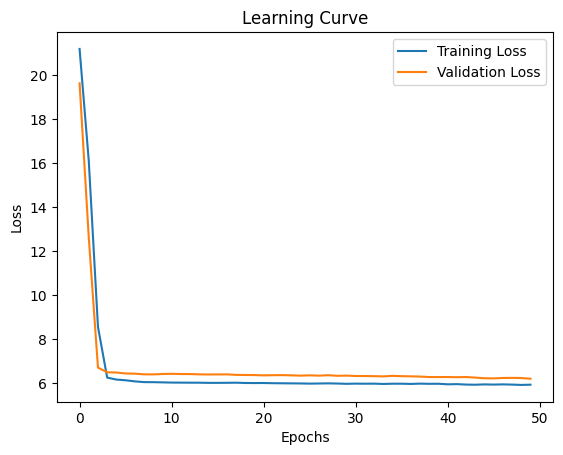

In [26]:
# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')  # Corrected label
plt.title('Learning Curve')  # Corrected title
plt.legend()
plt.show()

## Predicting ESG Score using Final Model

In [33]:
# Define mappings
controversies_mapping = {'No': 3, 'Red': 0, 'Orange': 1, 'Yellow': 2, 'Green': 3}
involvement_mapping = {'No': 1, 'Yes': 0}
sdg_mapping = {'No': 0, 'Aligned': 1, 'Strongly Aligned': 2}

# Collect user input
user_input = {
    "sdg.Climate Action": input("Enter Climate Action (No/Aligned/Strongly Aligned): ").strip(),
    "sdg.Responsible Consumption and Production": input("Enter Resp. Consumption (No/Aligned/Strongly Aligned): ").strip(),
    "Controversies.Environment": input("Enter Env Controversy (No/Red/Orange/Yellow/Green): ").strip(),
    "sdg.No Hunger": input("Enter No Hunger (No/Aligned/Strongly Aligned): ").strip(),
    "Controversies.Human Rights & Community": input("Enter Human Rights (No/Red/Orange/Yellow/Green): ").strip(),
    "sdg.Sustainable Cities and Communities": input("Enter Sust. Cities (No/Aligned/Strongly Aligned): ").strip(),
}

# Validate and map inputs
try:
    user_input_mapped = {
        col: mapping[value]
        for col, mapping, value in zip(
            user_input.keys(),
            [sdg_mapping] * 2 + [controversies_mapping] + [sdg_mapping] * 2 + [sdg_mapping],
            user_input.values()
        )
    }
except KeyError as e:
    print(f"Invalid input: {e}. Please enter valid values as specified.")
else:
    # Create input DataFrame
    input_df = pd.DataFrame([user_input_mapped])

    # Predict using the model
    prediction = model.predict(input_df)[0]  # First element of the prediction array
    print(f"\nPredicted ESG Score: {float(prediction):.2f}")


Enter Climate Action (No/Aligned/Strongly Aligned):  Aligned
Enter Resp. Consumption (No/Aligned/Strongly Aligned):  No
Enter Env Controversy (No/Red/Orange/Yellow/Green):  No
Enter No Hunger (No/Aligned/Strongly Aligned):  Aligned
Enter Human Rights (No/Red/Orange/Yellow/Green):  No
Enter Sust. Cities (No/Aligned/Strongly Aligned):  Strongly Aligned


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Predicted ESG Score: 24.49


/tmp/ipykernel_30/1188533637.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"\nPredicted ESG Score: {float(prediction):.2f}")
